<a href="https://colab.research.google.com/github/maksudrakib44/cracked-egg-detection/blob/master/Egg_vs_CrackedEgg_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Egg vs Cracked Egg Detector

In [ ]:
!pip install -q "numpy==1.26.4" "ultralytics==8.3.0" seaborn matplotlib

import numpy as np
from ultralytics import YOLO

print("NumPy version:", np.__version__)


NumPy version: 1.26.4


In [ ]:
import os

print(os.listdir("/content"))


['.config', 'Egg_vs_CrackedEgg_Detection.v2i.yolov8.zip', 'yolov8s.pt', 'egg_dataset', 'egg_runs', 'runs', 'wandb', 'yolov8m.pt', 'yolov8n.pt', 'sample_data']


In [ ]:
import zipfile
import os

zip_path = "/content/Egg_vs_CrackedEgg_Detection.v2i.yolov8.zip"

extract_dir = "/content/egg_dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Extracted folders:", os.listdir(extract_dir))


Extracted folders: ['valid', 'data.yaml', 'test', 'train', 'README.roboflow.txt']


In [ ]:
import yaml

data_yaml_path = "/content/egg_dataset/data.yaml"

with open(data_yaml_path, 'r') as f:
    data_cfg = yaml.safe_load(f)

# Standard fixes
data_cfg["path"] = "/content/egg_dataset"
data_cfg["train"] = "train/images"
data_cfg["val"]   = "valid/images"
data_cfg["test"]  = "test/images"
data_cfg["names"] = ["cracked_egg", "whole_egg"]

with open(data_yaml_path, 'w') as f:
    yaml.safe_dump(data_cfg, f, sort_keys=False)

print(open(data_yaml_path).read())


train: train/images
val: valid/images
test: test/images
nc: 2
names:
- cracked_egg
- whole_egg
roboflow:
  workspace: maksud
  project: egg_vs_crackedegg_detection-vhdrw
  version: 2
  license: Private
  url: https://app.roboflow.com/maksud/egg_vs_crackedegg_detection-vhdrw/2
path: /content/egg_dataset



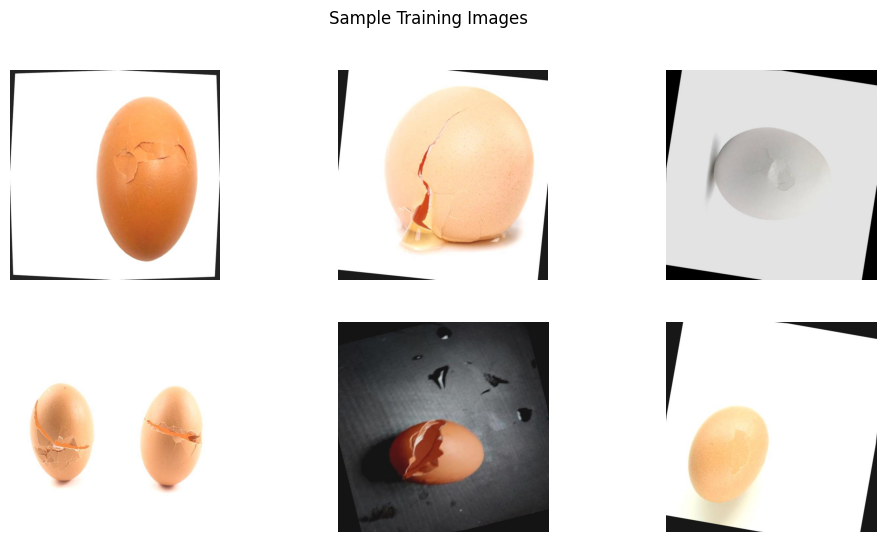

In [ ]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

train_imgs = glob.glob("/content/egg_dataset/train/images/*.jpg")[:6]

plt.figure(figsize=(12,6))
for i, img_path in enumerate(train_imgs):
    plt.subplot(2,3,i+1)
    plt.imshow(Image.open(img_path))
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()


In [ ]:
model1 = YOLO("yolov8s.pt")

results1 = model1.train(
    data=data_yaml_path,
    imgsz=640,
    epochs=50,
    batch=16,
    project="egg_runs",
    name="exp1_yolov8s",
    verbose=True
)


New https://pypi.org/project/ultralytics/8.3.234 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/egg_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=egg_runs, name=exp1_yolov8s7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

wandb: Currently logged in as: maksudrakib44 (maksudrakib44-green-university-of-bangladesh) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/egg_dataset/train/labels.cache... 681 images, 0 backgrounds, 0 corrupt: 100%|██████████| 681/681 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/egg_dataset/valid/labels.cache... 65 images, 0 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]


Plotting labels to egg_runs/exp1_yolov8s7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to egg_runs/exp1_yolov8s7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.2G      1.237      2.348      1.579         30        640: 100%|██████████| 43/43 [00:29<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.08s/it]

                   all         65         81    0.00504      0.992      0.569      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.01G      1.206       1.58      1.478         27        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         65         81      0.846      0.347      0.386      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.99G      1.268      1.447       1.51         26        640: 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         65         81      0.286      0.278      0.122     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.98G      1.264      1.317      1.482         28        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         65         81      0.561      0.491      0.472      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.97G      1.213      1.155      1.454         20        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         65         81      0.805      0.788      0.853      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.99G      1.191       1.05      1.426         26        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         65         81      0.493      0.688       0.61      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.98G      1.148     0.9826      1.399         22        640: 100%|██████████| 43/43 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         65         81       0.85      0.824      0.883      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.98G      1.199     0.9439      1.438         22        640: 100%|██████████| 43/43 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         65         81      0.712      0.839       0.91      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.99G      1.191     0.9419      1.419         25        640: 100%|██████████| 43/43 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         65         81      0.884      0.796      0.856      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.01G      1.156     0.9218      1.394         33        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         65         81      0.933      0.862      0.908      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.15G      1.128     0.8978      1.388         27        640: 100%|██████████| 43/43 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         65         81      0.916      0.879      0.931      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.98G      1.139     0.8611      1.383         21        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         65         81      0.898      0.832      0.879      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.01G      1.144     0.8541      1.371         26        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         65         81      0.955      0.843      0.912      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.01G      1.105     0.8076       1.34         40        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         65         81      0.928      0.844      0.914      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.98G      1.118     0.8023      1.345         35        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         65         81      0.849       0.81      0.823      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         4G        1.1     0.7605      1.342         28        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         65         81      0.829      0.902      0.911      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.97G      1.071     0.7699      1.319         16        640: 100%|██████████| 43/43 [00:12<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         65         81      0.968      0.862      0.914      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.98G        1.1      0.744      1.336         27        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         65         81      0.911      0.866      0.929      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.97G      1.057     0.7028      1.292         24        640: 100%|██████████| 43/43 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         65         81      0.922      0.887      0.943      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.98G      1.071     0.7273      1.329         26        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         65         81      0.924      0.908      0.924      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.97G      1.055     0.7094      1.323         37        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         65         81      0.928      0.913      0.941      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.99G      1.097     0.7257      1.357         19        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         65         81      0.903      0.856       0.93      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.98G      1.068     0.6866      1.311         27        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         65         81      0.904      0.873      0.916      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         4G      1.047     0.6887      1.322         33        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

                   all         65         81      0.922      0.908      0.935       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         4G      1.006     0.6631      1.291         26        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         65         81      0.926      0.852       0.89      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.98G       1.02       0.68      1.296         24        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         65         81      0.941      0.874      0.926      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.98G      0.994     0.6484      1.289         25        640: 100%|██████████| 43/43 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         65         81      0.928      0.939      0.942      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.98G     0.9807     0.6719      1.268         22        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         65         81      0.922      0.903      0.946      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.97G     0.9851     0.6295      1.271         32        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         65         81      0.848      0.876      0.909       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.99G     0.9802      0.643      1.259         37        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         65         81      0.964      0.852      0.941      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.98G     0.9639     0.6134      1.261         21        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         65         81      0.968      0.826      0.919      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.01G     0.9446     0.6157      1.252         27        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         65         81      0.936      0.849      0.911      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.99G      0.939     0.6039      1.245         36        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         65         81      0.948      0.893      0.938      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.99G     0.9472     0.5917      1.245         31        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         65         81      0.906      0.908      0.935      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.98G     0.9456     0.6002       1.23         31        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         65         81        0.9      0.917      0.923       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.98G     0.9234     0.5766      1.255         23        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         65         81      0.935      0.895      0.914       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.01G     0.9164     0.5717      1.229         26        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         65         81      0.954       0.92      0.953      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.99G      0.932     0.5813      1.245         24        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         65         81      0.976      0.937       0.96      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.97G     0.9024     0.5606      1.231         22        640: 100%|██████████| 43/43 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.973      0.922      0.958      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.99G     0.8835     0.5597      1.224         24        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         65         81      0.964      0.895      0.949      0.648


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.97G      0.817     0.4341      1.242          9        640: 100%|██████████| 43/43 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         65         81      0.899      0.895       0.93      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.99G     0.8197     0.4163      1.253         15        640: 100%|██████████| 43/43 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         65         81      0.947      0.895      0.935      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.96G     0.7736     0.3902      1.213         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         65         81      0.977      0.883      0.938        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.98G     0.8068      0.383       1.22         10        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         65         81      0.971      0.887      0.944      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.97G      0.771     0.3691      1.205         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         65         81      0.973      0.895      0.939      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.99G     0.7766     0.3647      1.217         10        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         65         81      0.951      0.875      0.935       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.96G     0.7497     0.3714      1.201          9        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         65         81       0.97      0.878      0.935      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.98G     0.7773     0.3638      1.206         11        640: 100%|██████████| 43/43 [00:12<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         65         81       0.97      0.895      0.937      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         4G     0.7536     0.3492      1.193         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         65         81       0.97      0.895      0.936      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.01G     0.7297     0.3454      1.167         14        640: 100%|██████████| 43/43 [00:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         65         81       0.97      0.895      0.937      0.669



50 epochs completed in 0.216 hours.
Optimizer stripped from egg_runs/exp1_yolov8s7/weights/last.pt, 19.9MB
Optimizer stripped from egg_runs/exp1_yolov8s7/weights/best.pt, 19.9MB

Validating egg_runs/exp1_yolov8s7/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]


                   all         65         81      0.935      0.902      0.924      0.723
           cracked_egg         53         62      0.952      0.963      0.975       0.77
             whole_egg         16         19      0.917      0.842      0.873      0.676
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to egg_runs/exp1_yolov8s7



Displaying: egg_runs/exp1_yolov8s/F1_curve.png


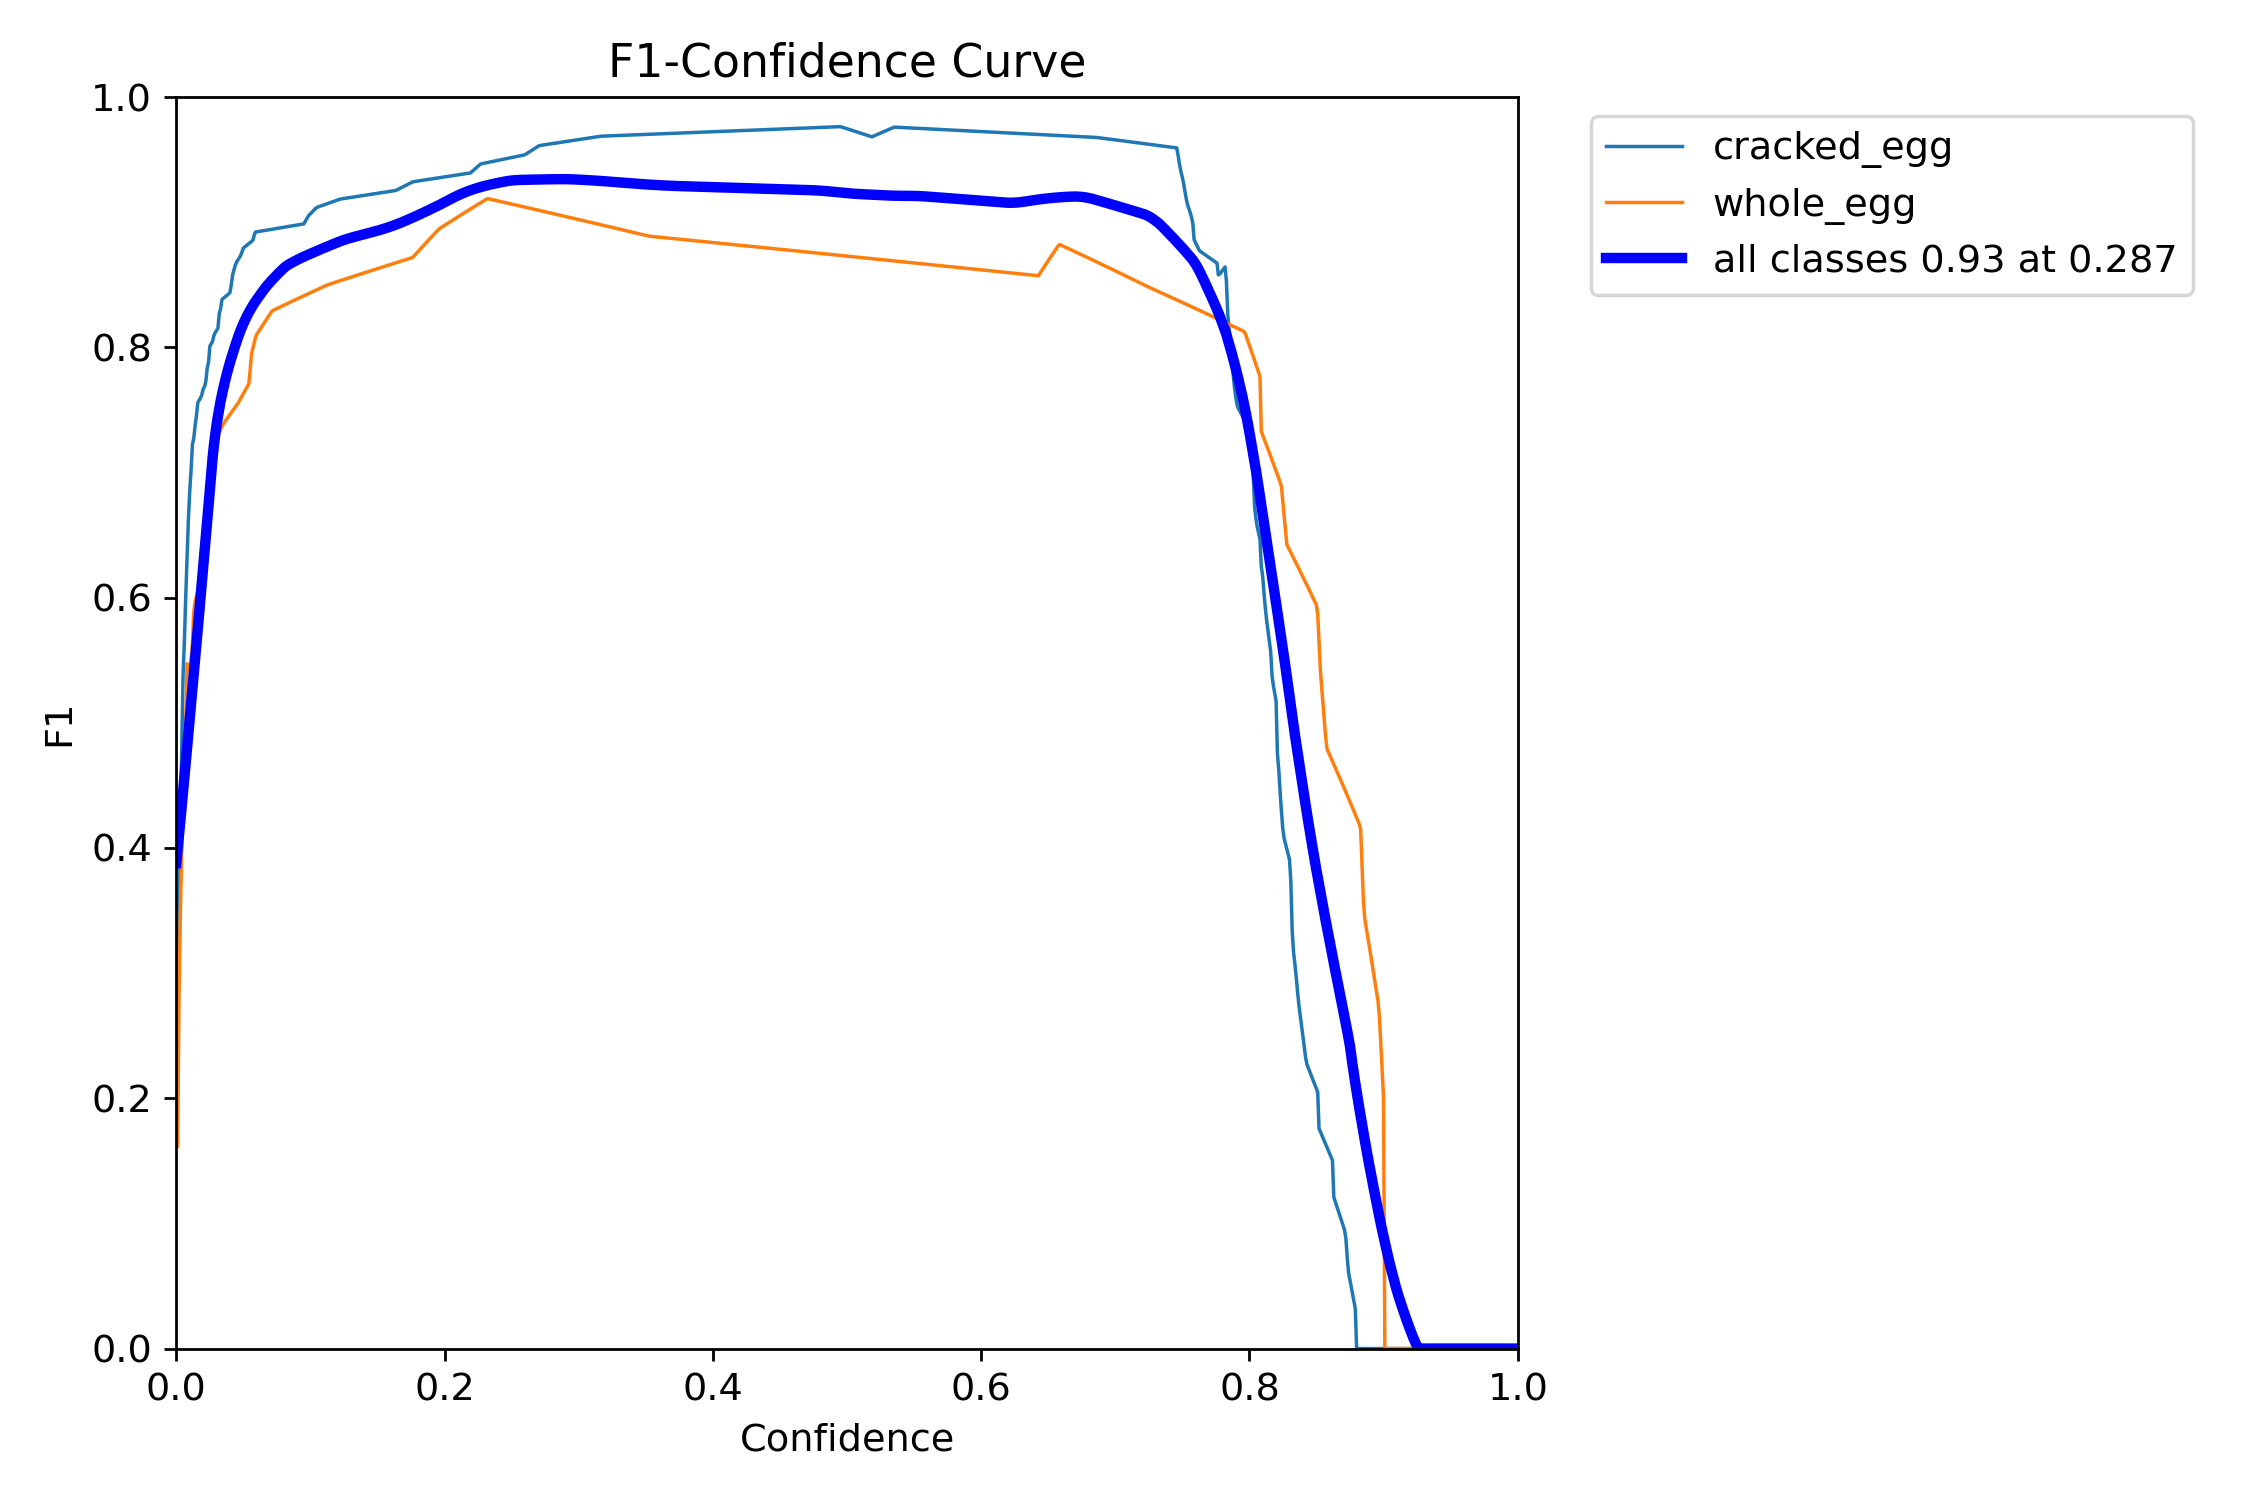


Displaying: egg_runs/exp1_yolov8s/PR_curve.png


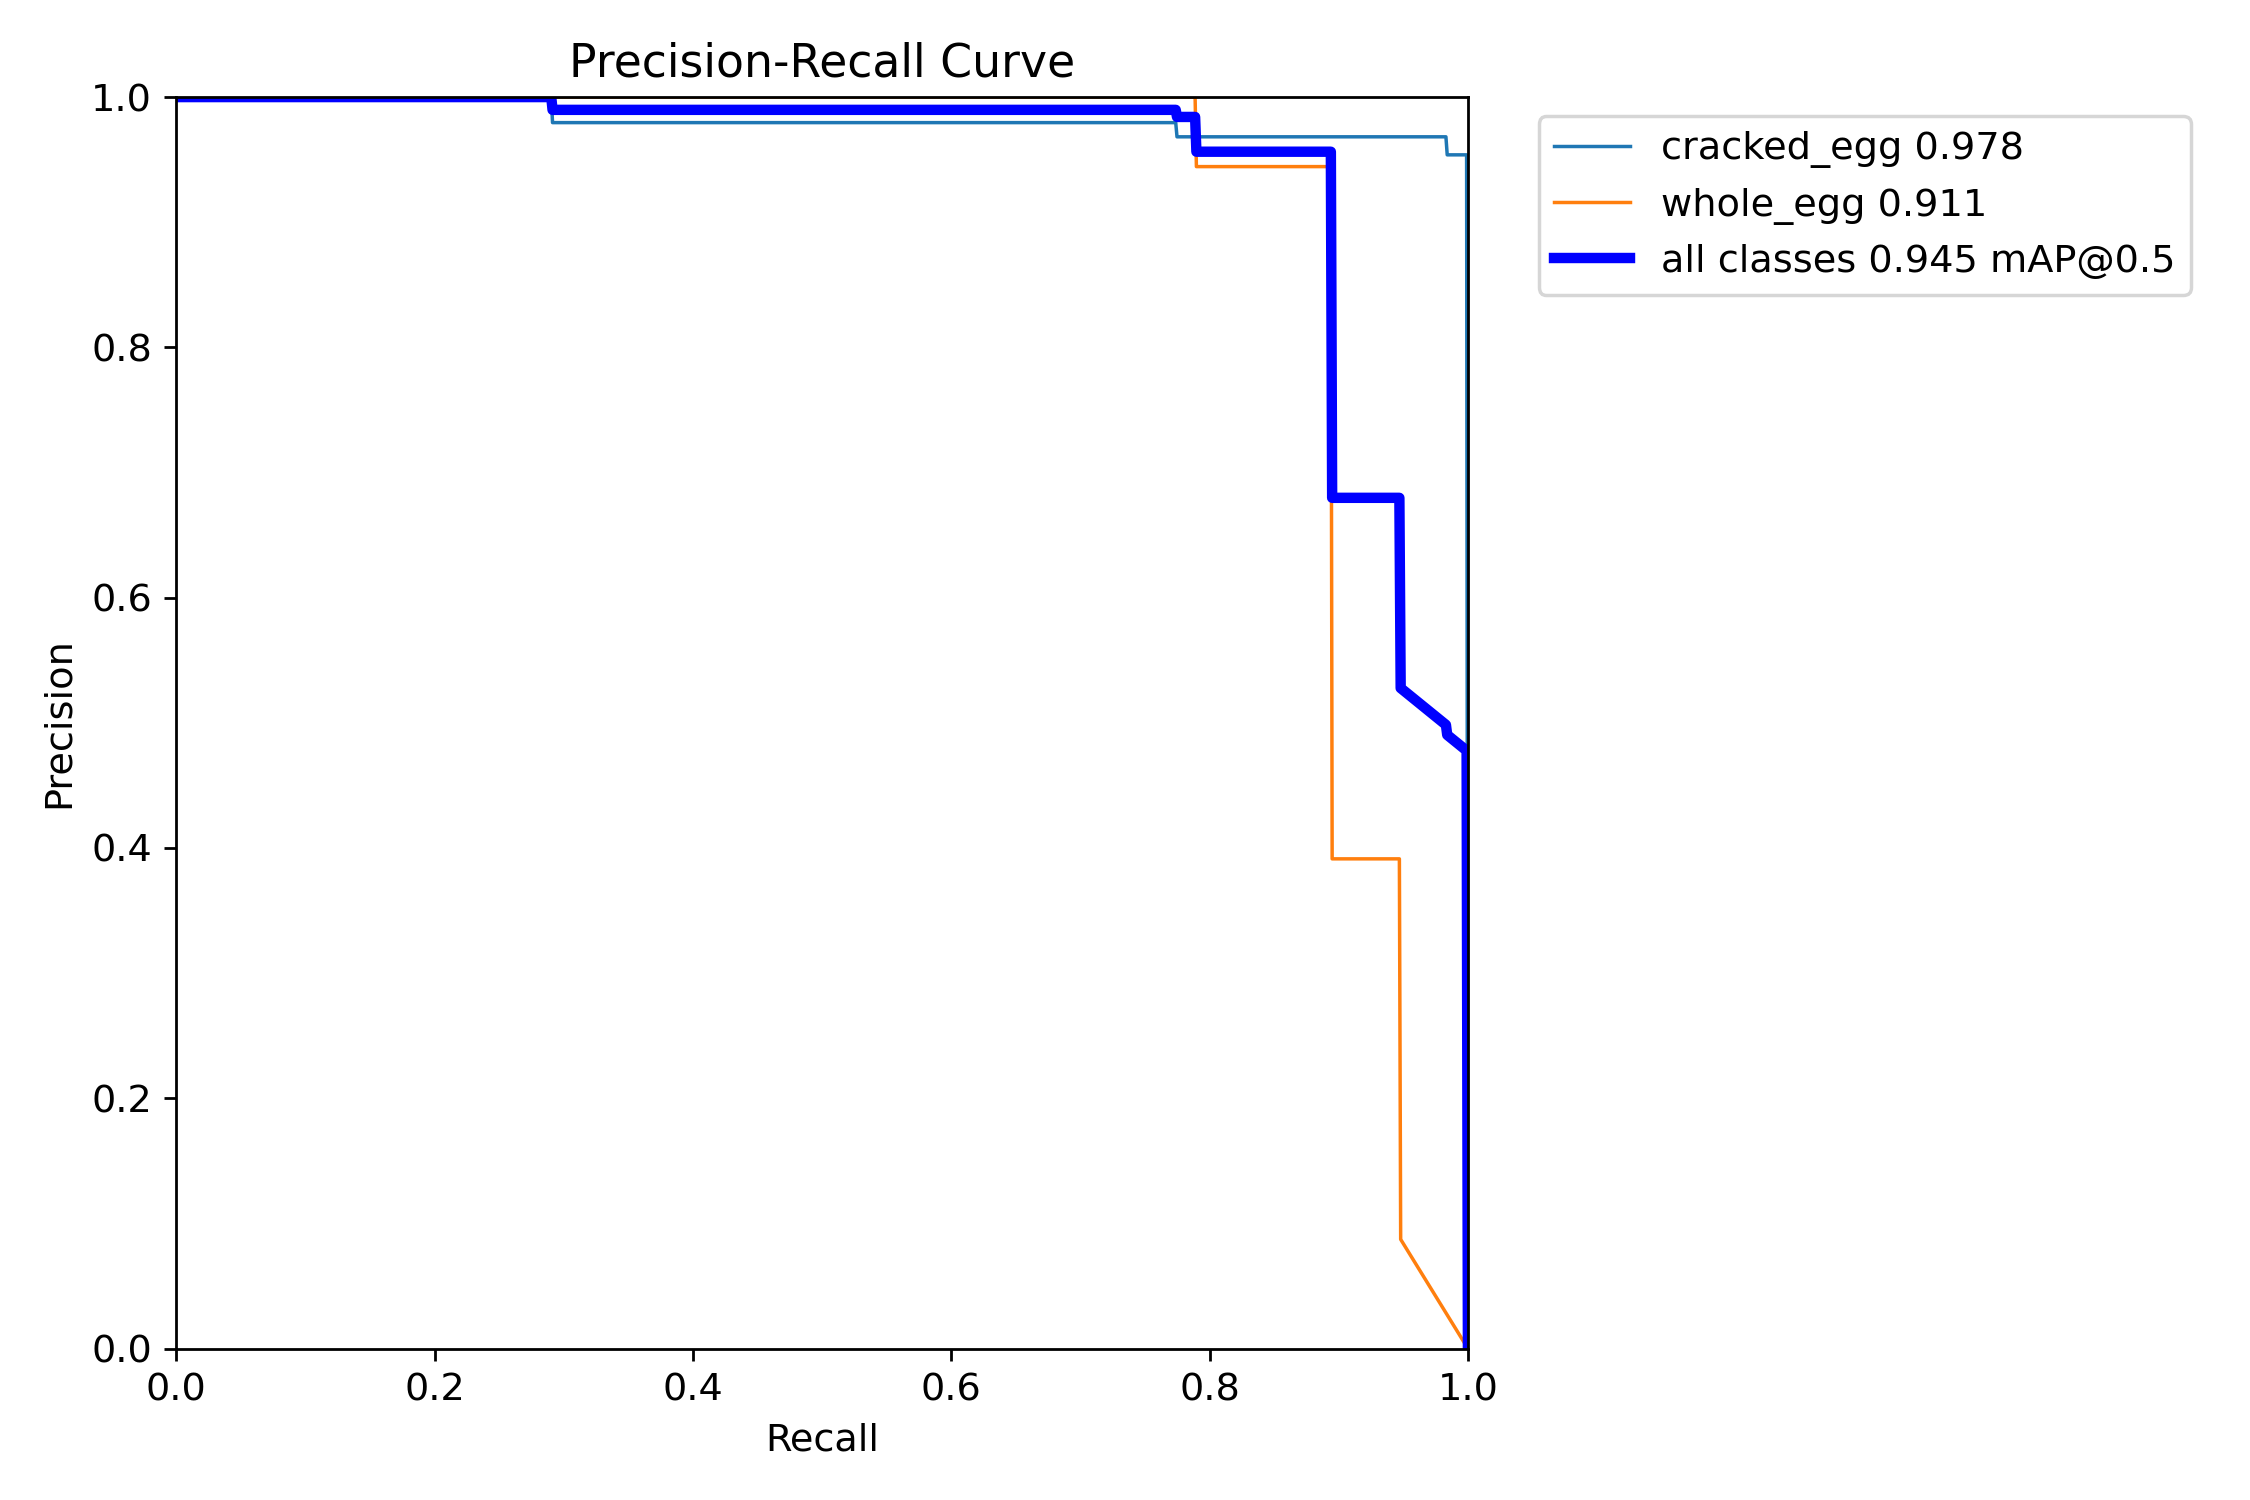


Displaying: egg_runs/exp1_yolov8s/P_curve.png


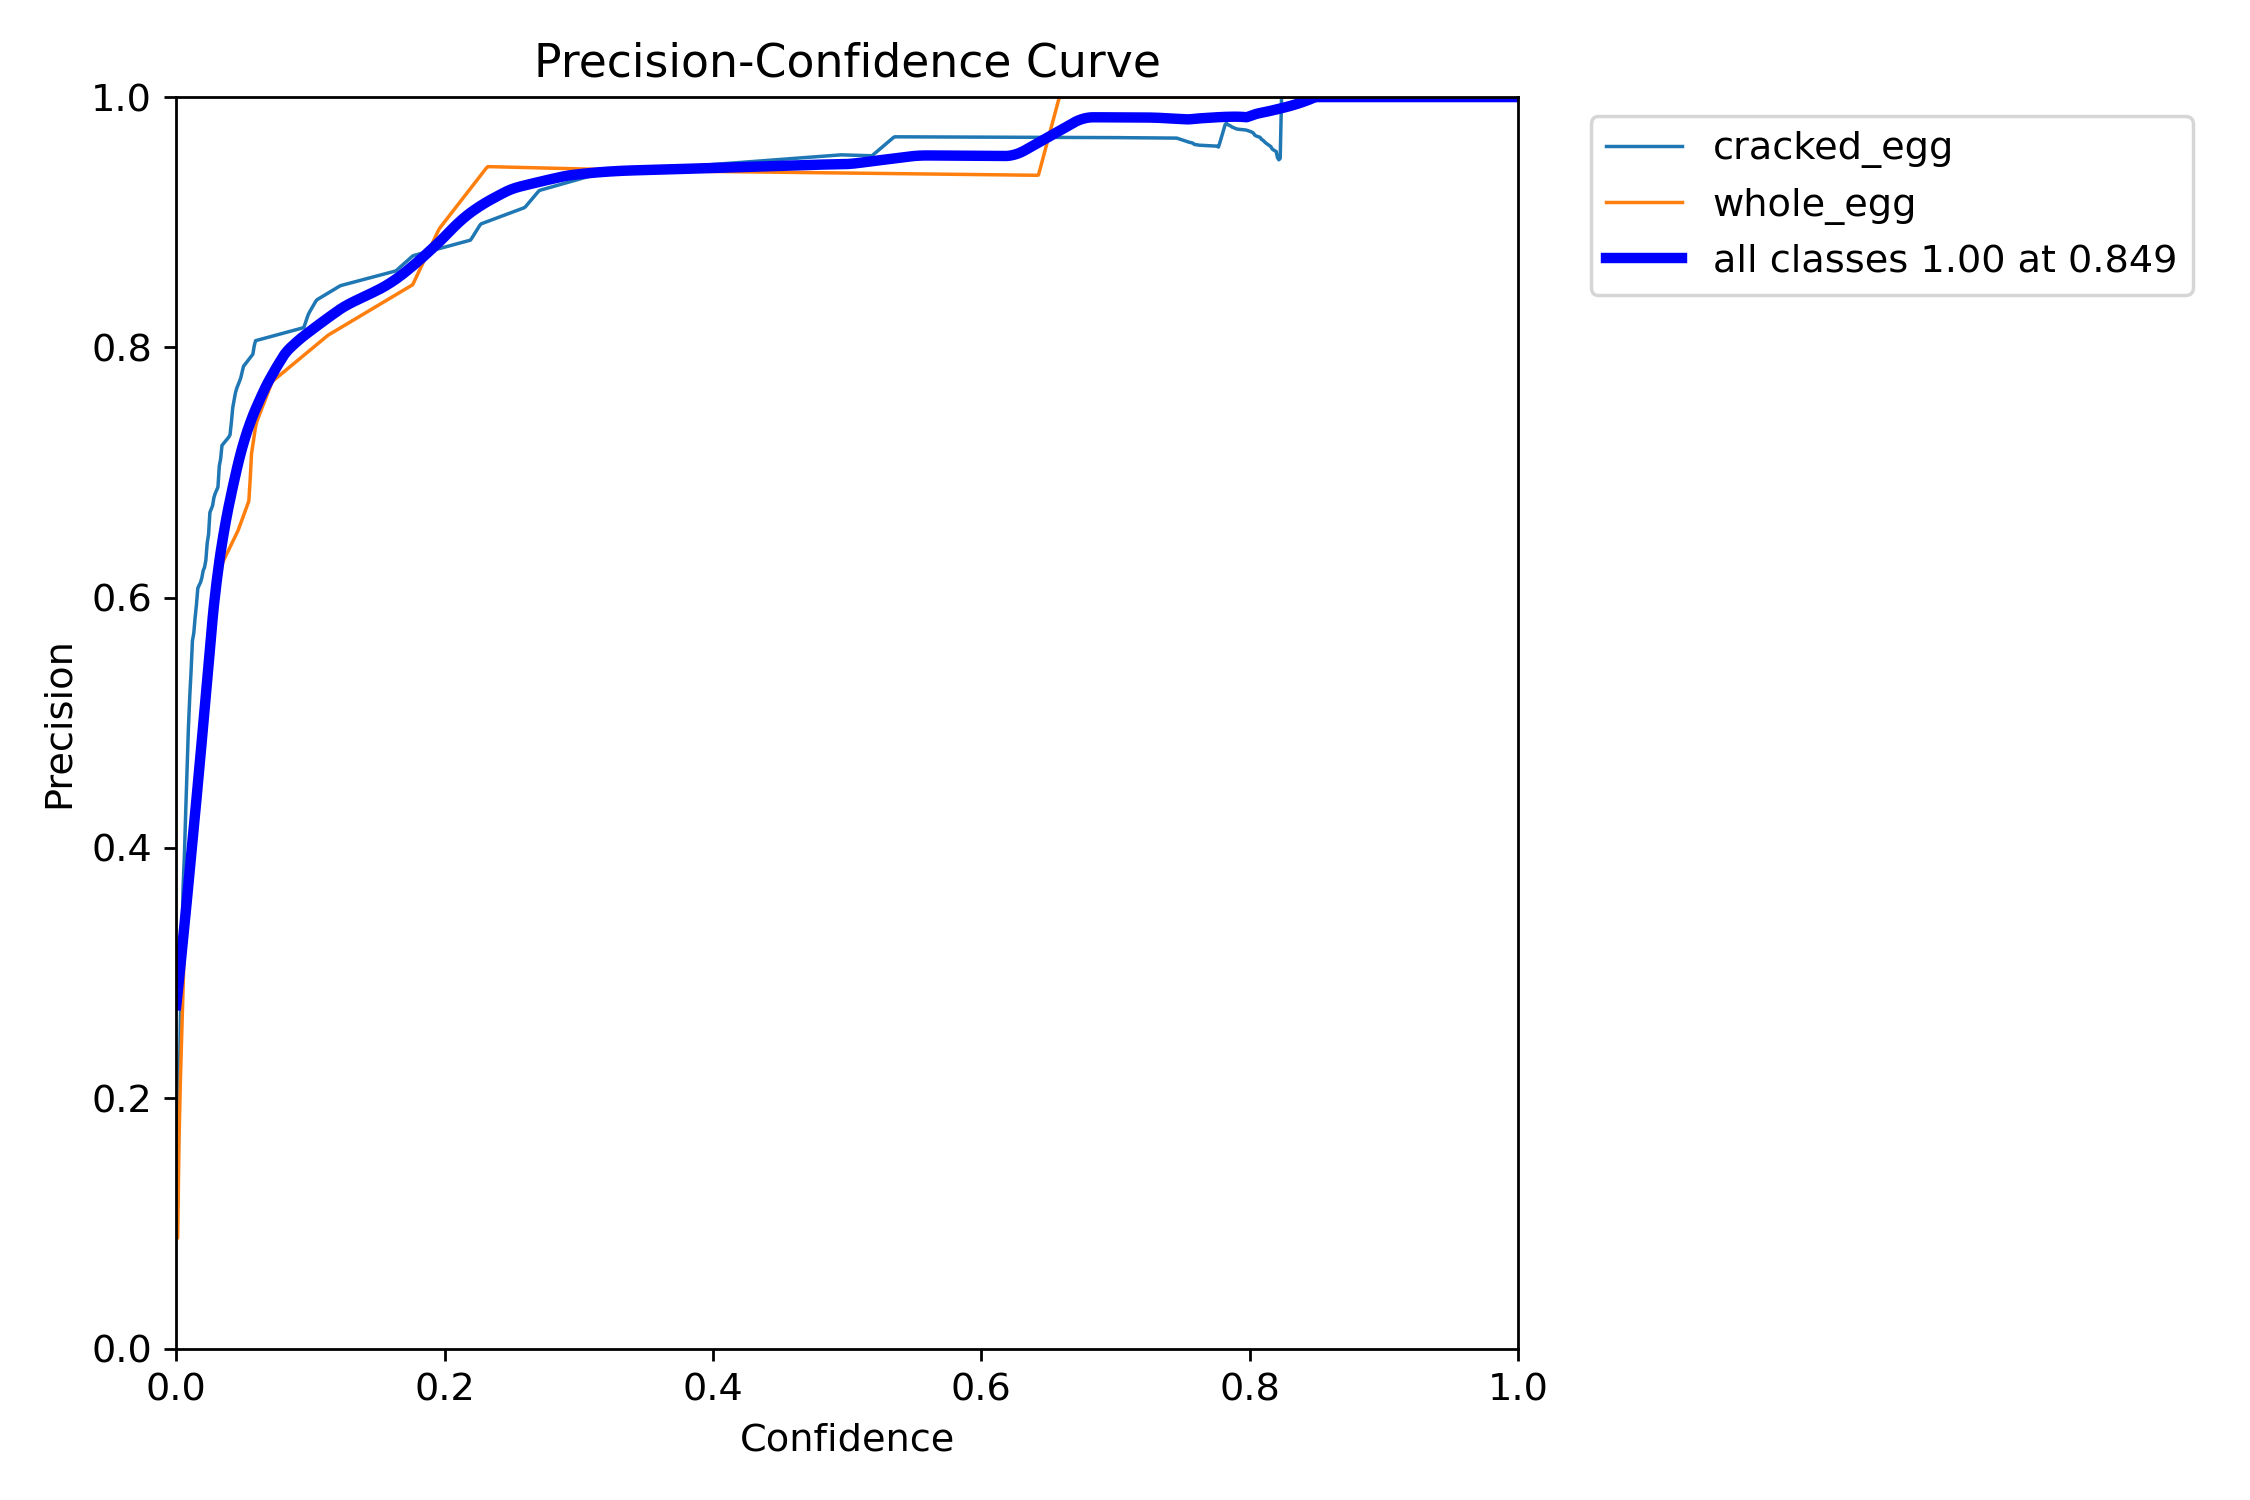


Displaying: egg_runs/exp1_yolov8s/R_curve.png


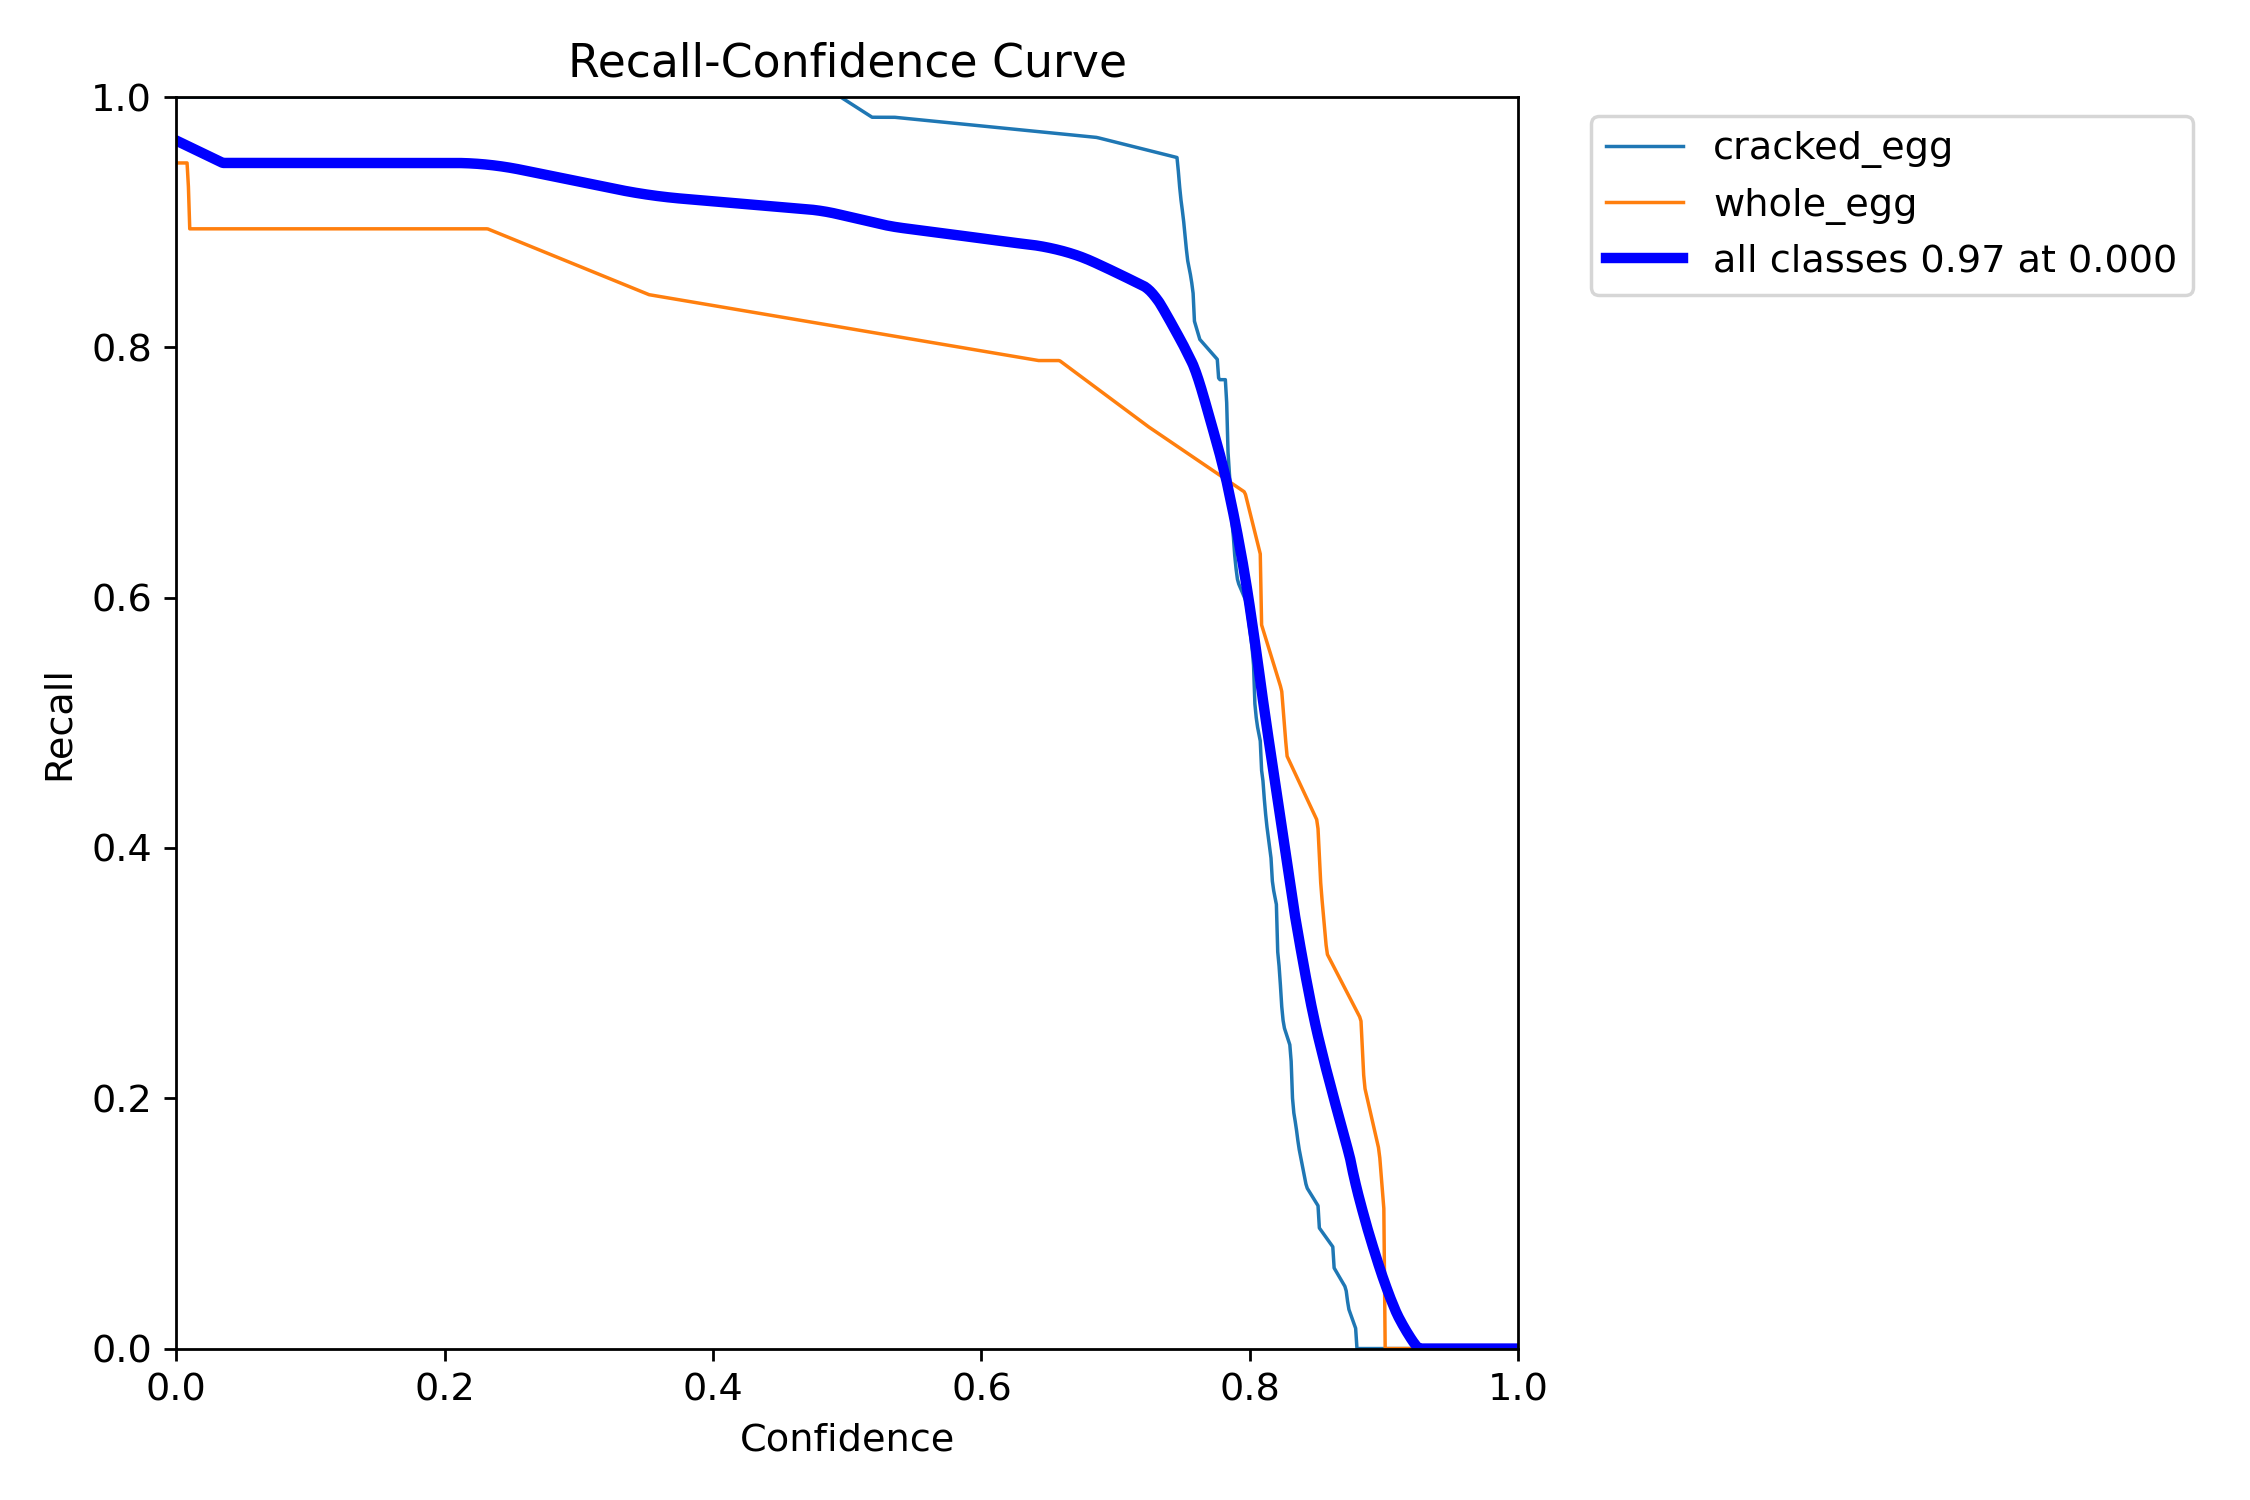


Displaying: egg_runs/exp1_yolov8s/confusion_matrix.png


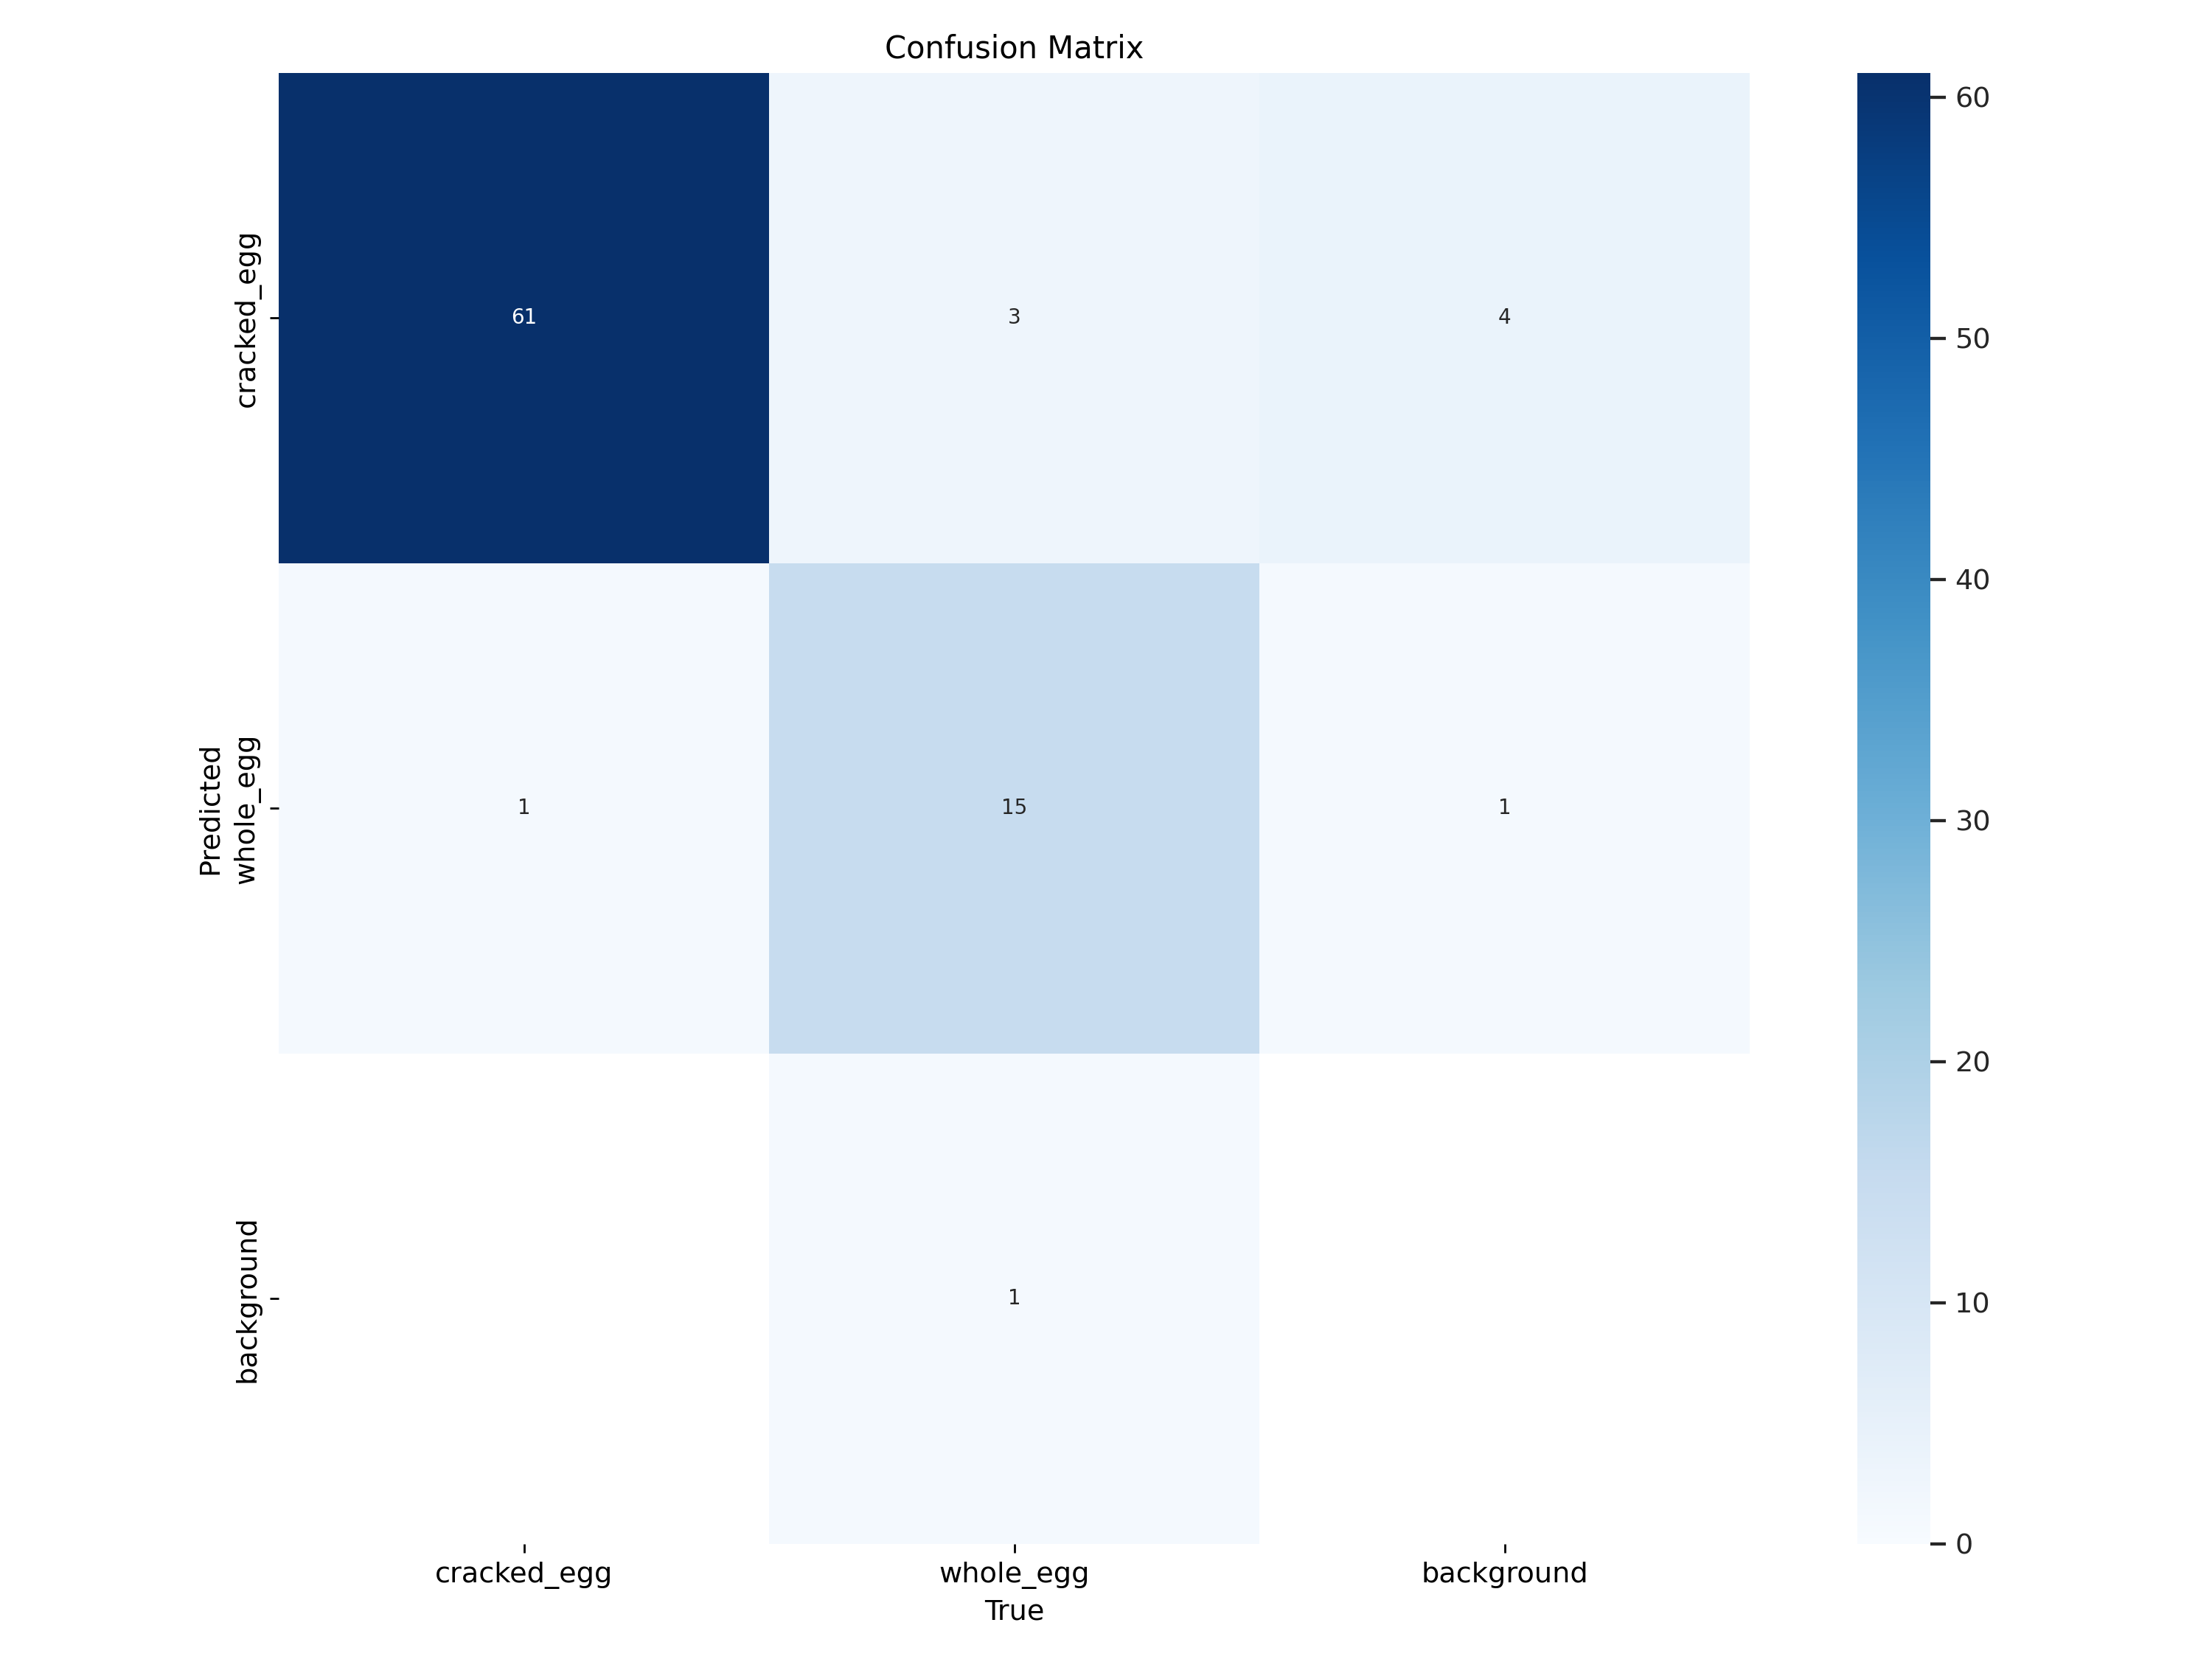


Displaying: egg_runs/exp1_yolov8s/confusion_matrix_normalized.png


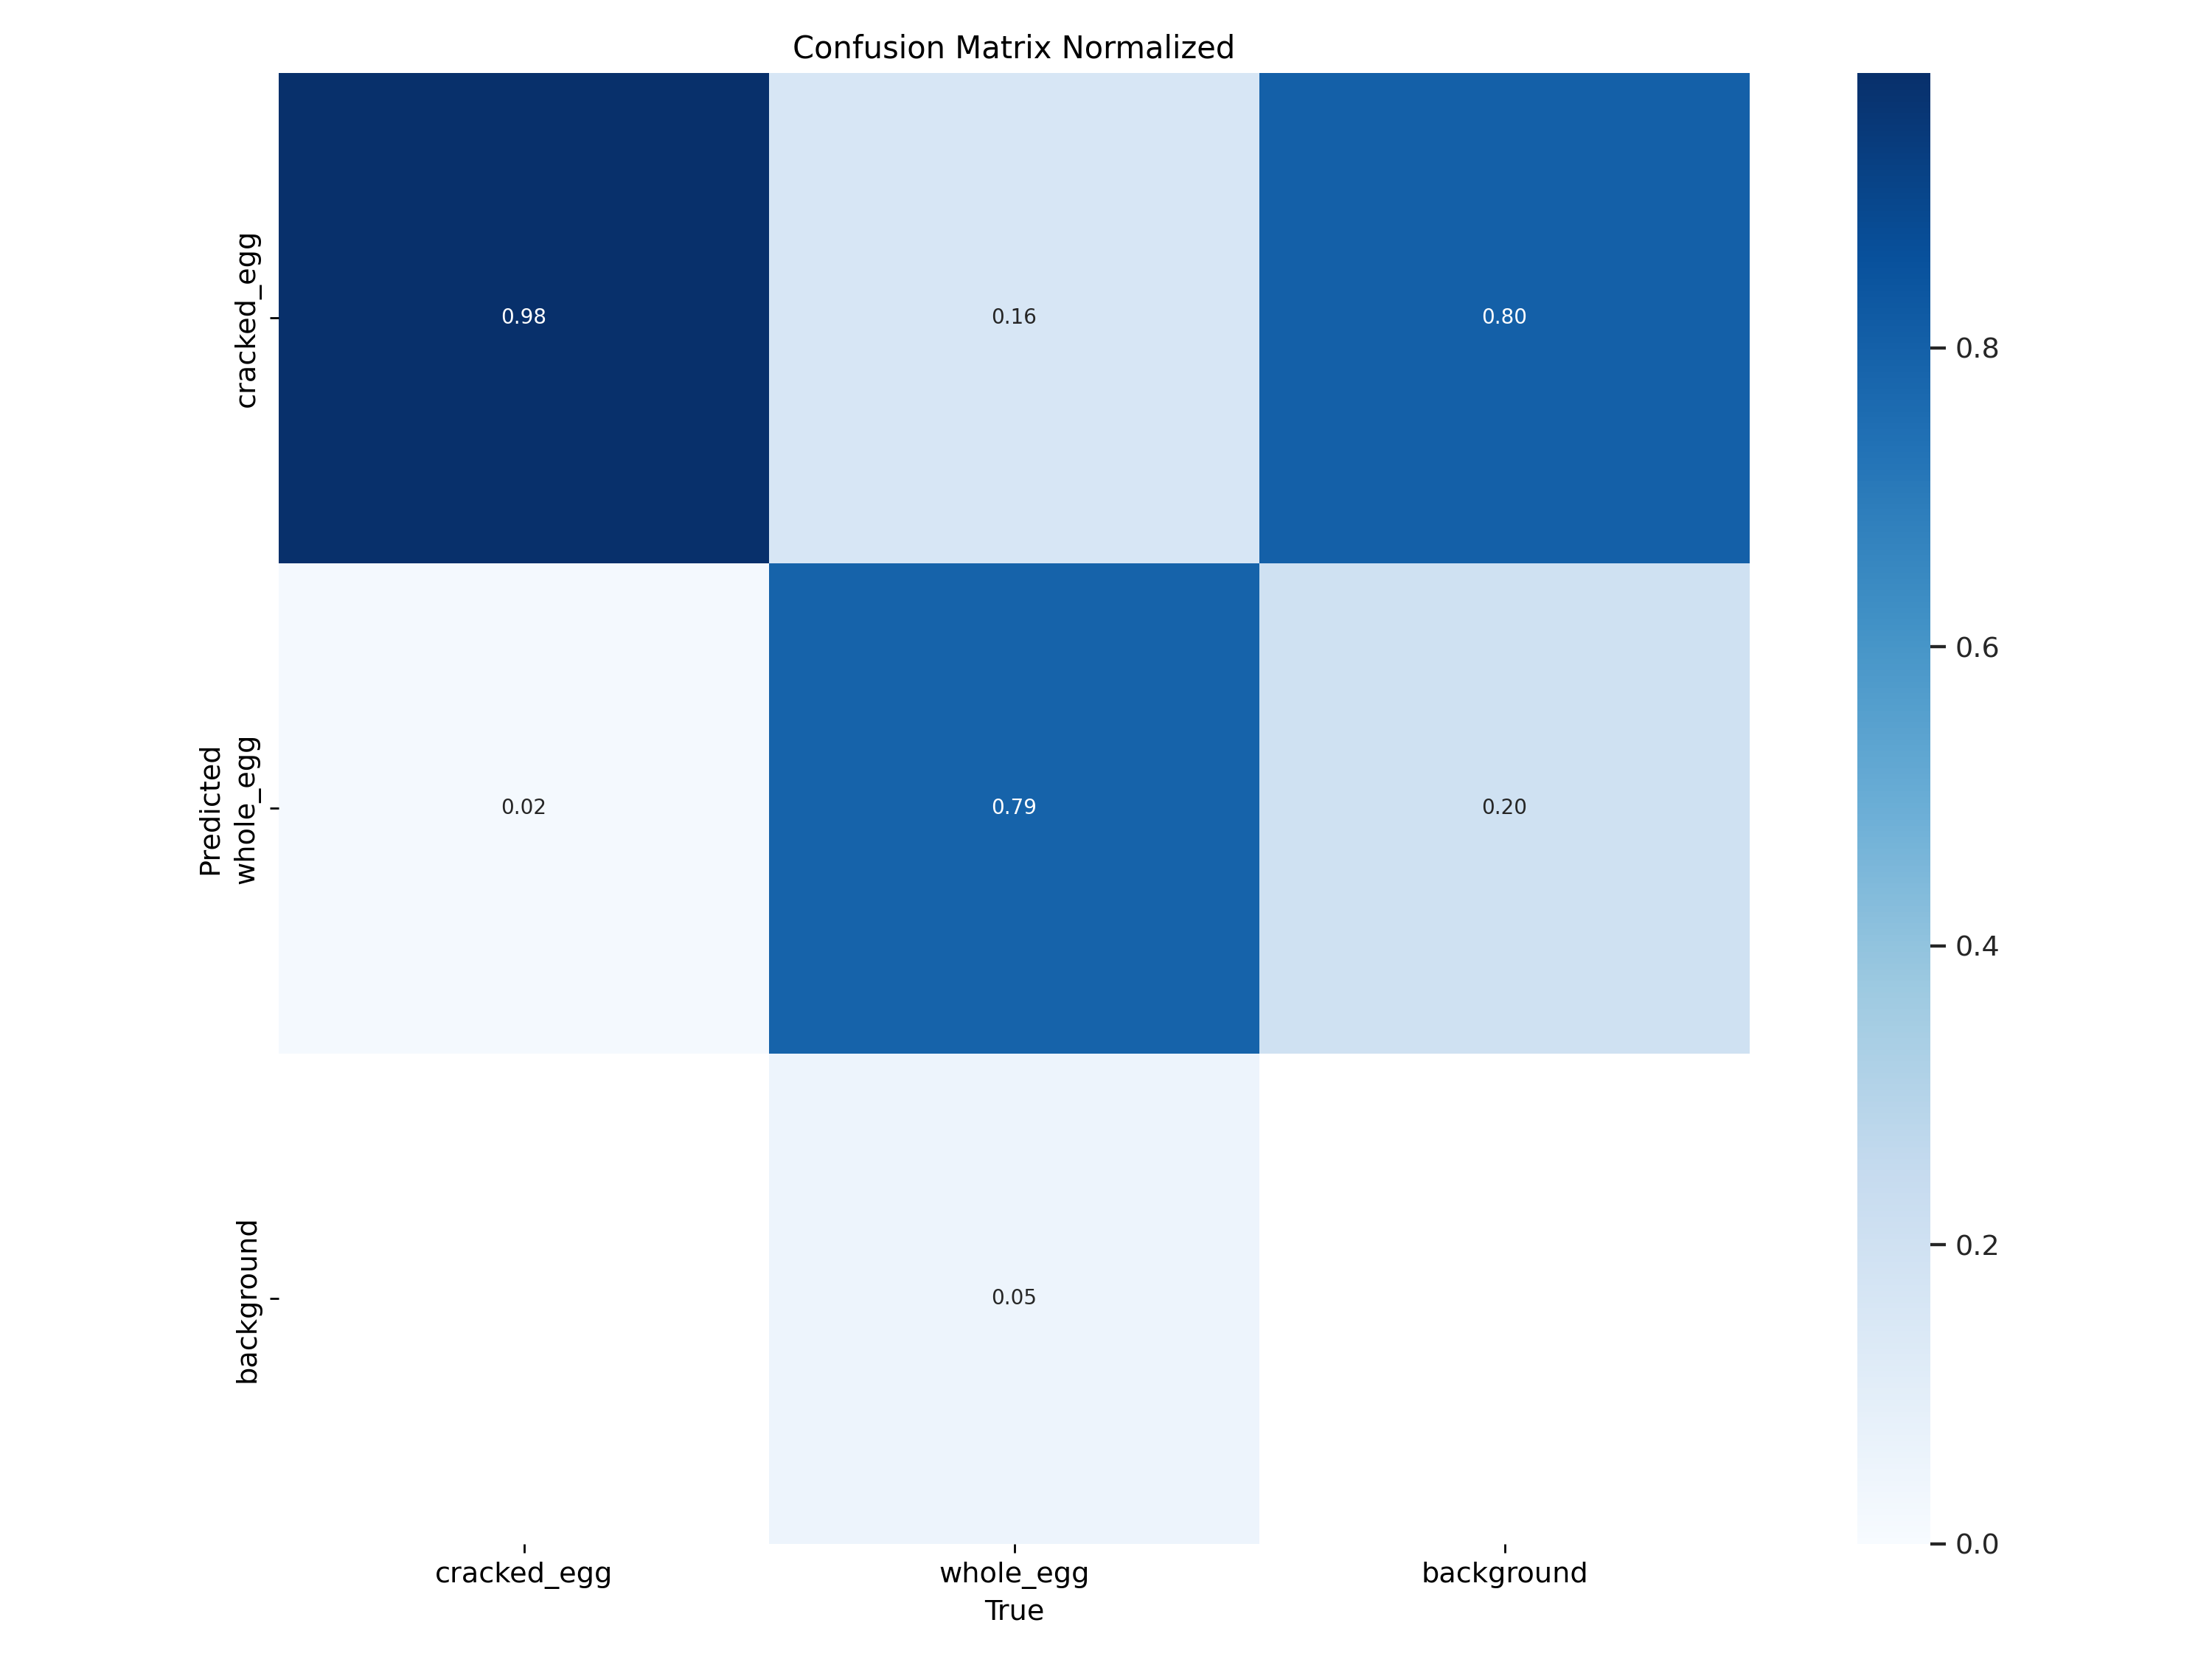


Displaying: egg_runs/exp1_yolov8s/results.png


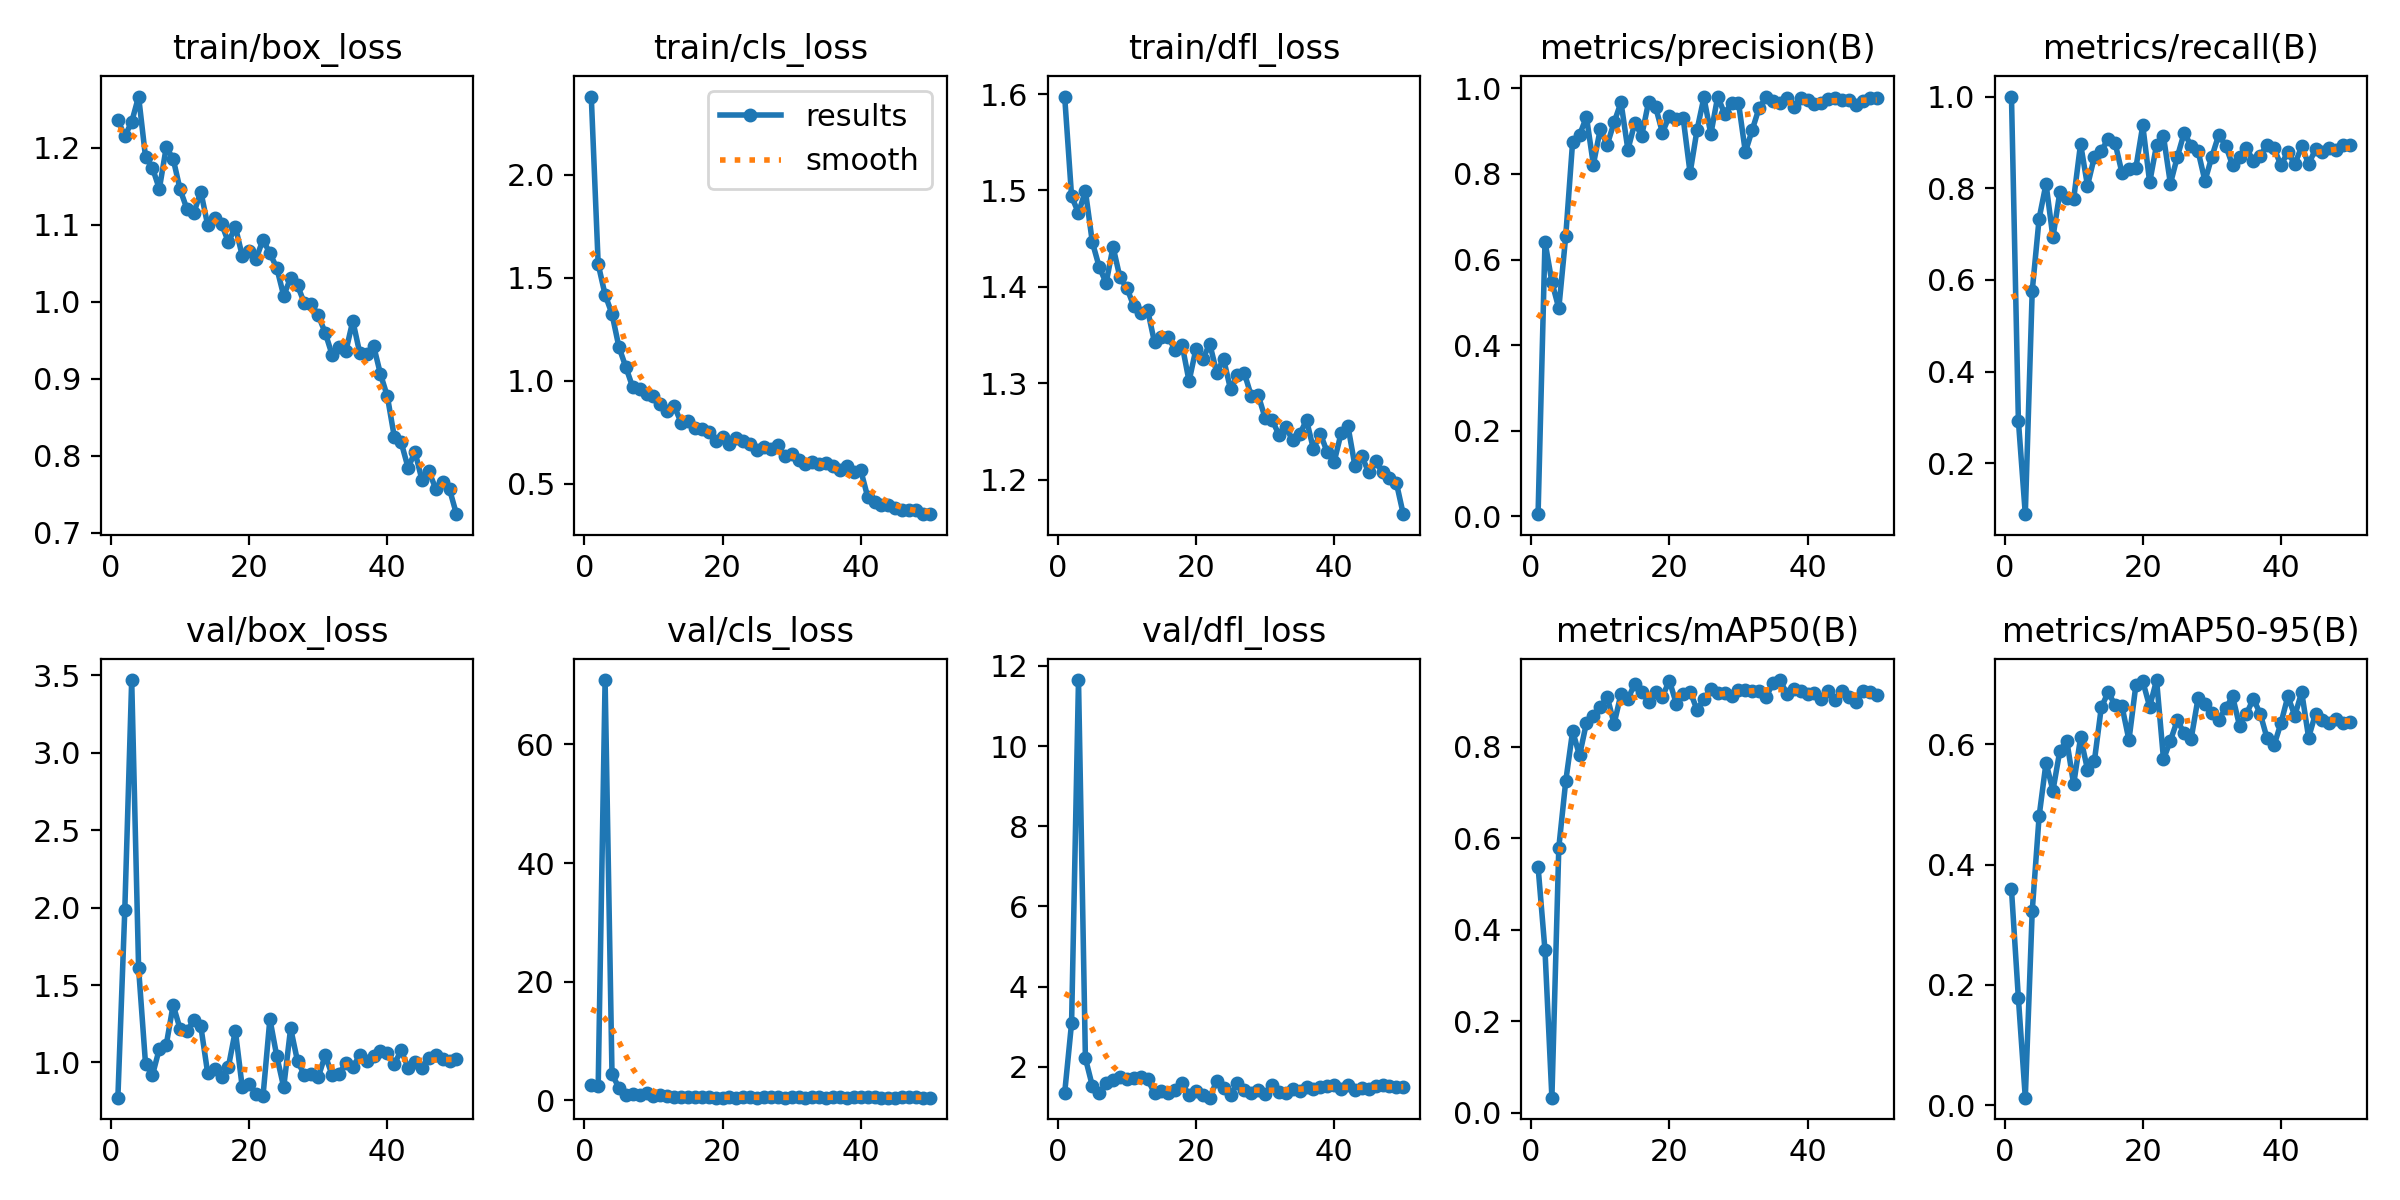

In [ ]:
import glob
from IPython.display import Image, display

curve_files = sorted(glob.glob("egg_runs/exp1_yolov8s/*.png"))

for f in curve_files:
    print(f"\nDisplaying:", f)
    display(Image(filename=f))


In [ ]:
from ultralytics import YOLO

# Load the best weights from Experiment 1
exp1_weights = "egg_runs/exp1_yolov8s/weights/best.pt"
model_exp1 = YOLO(exp1_weights)

# Evaluate on validation set
metrics_exp1 = model_exp1.val(
    data=data_yaml_path,
    imgsz=640,
    project="egg_runs",
    name="exp1_yolov8s_val"
)

print("Experiment 1 (YOLOv8s) metrics dict:\n")
print(metrics_exp1.results_dict)


Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs


val: Scanning /content/egg_dataset/valid/labels.cache... 65 images, 0 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


                   all         65         81      0.936      0.937      0.945      0.701
           cracked_egg         53         62      0.928          1      0.978      0.731
             whole_egg         16         19      0.943      0.874      0.911       0.67
Speed: 0.5ms preprocess, 11.5ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to egg_runs/exp1_yolov8s_val2
Experiment 1 (YOLOv8s) metrics dict:

{'metrics/precision(B)': 0.9355728094753626, 'metrics/recall(B)': 0.9370672335140493, 'metrics/mAP50(B)': 0.9445041218271032, 'metrics/mAP50-95(B)': 0.7007120870908996, 'fitness': 0.72509129056452}


Total test images found: 32
  /content/egg_dataset/test/images/11_jpg.rf.b15be37197cded5b71fd6cb2d257fbe9.jpg
  /content/egg_dataset/test/images/17_jpg.rf.3a0c73acb511379e9e32059e15444ab4.jpg
  /content/egg_dataset/test/images/17_jpg.rf.7a84401bbfa52c458607e448d506b9c3.jpg
  /content/egg_dataset/test/images/1_png.rf.cfcee3e76a58e8556b04c07b008da421.jpg
  /content/egg_dataset/test/images/20211207_153947_mp4-5_jpg.rf.03b5321b1746ca0c4cc6f61374573ece.jpg
  /content/egg_dataset/test/images/20211207_154434-0-_jpg.rf.91701c066fa92b52d65770442997e683.jpg

0: 640x640 1 cracked_egg, 12.1ms
1: 640x640 1 cracked_egg, 12.1ms
2: 640x640 1 cracked_egg, 12.1ms
3: 640x640 4 whole_eggs, 12.1ms
4: 640x640 1 whole_egg, 12.1ms
5: 640x640 1 cracked_egg, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to egg_runs/exp1_yolov8s_test_preds_custom

Showing prediction images:

Prediction: egg_runs/exp1_yolov8s_test_preds_custom/11_jpg.rf.b15be

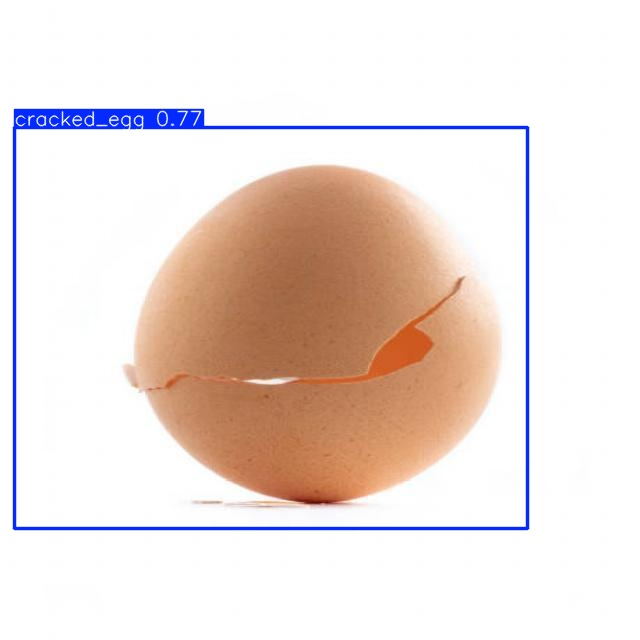


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/17_jpg.rf.3a0c73acb511379e9e32059e15444ab4.jpg


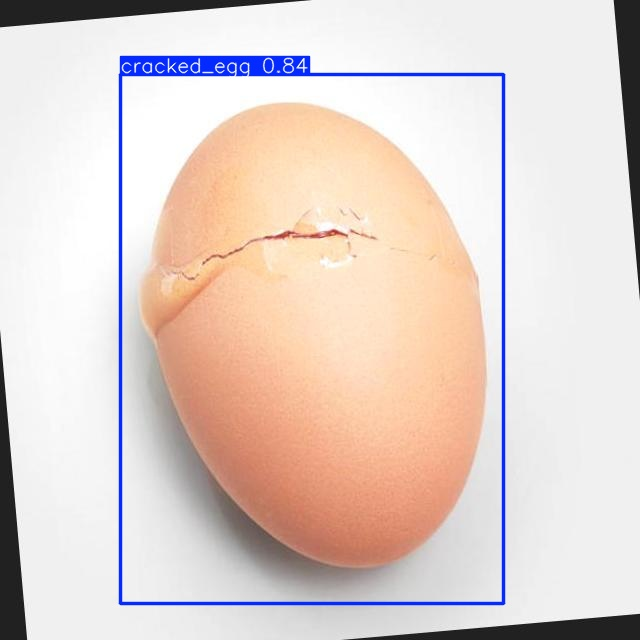


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/17_jpg.rf.7a84401bbfa52c458607e448d506b9c3.jpg


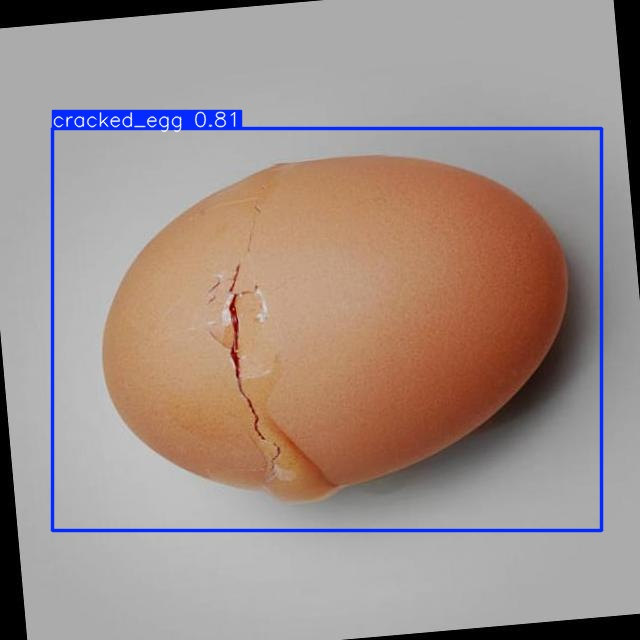


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/1_png.rf.cfcee3e76a58e8556b04c07b008da421.jpg


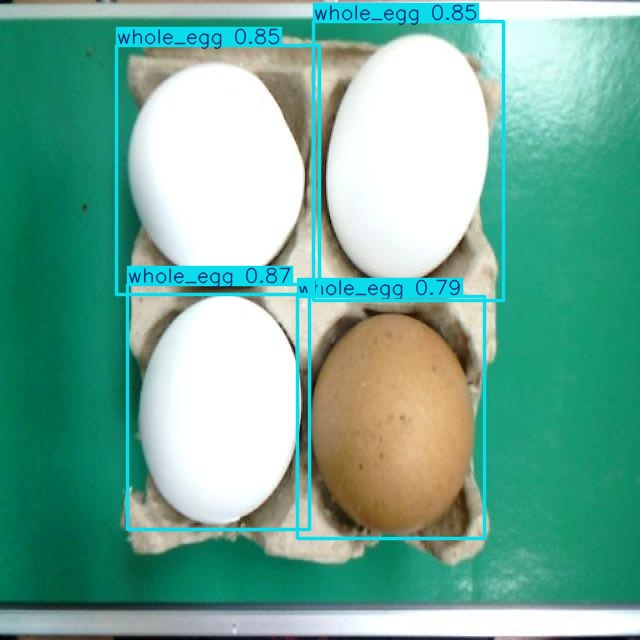


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/20211207_153947_mp4-5_jpg.rf.03b5321b1746ca0c4cc6f61374573ece.jpg


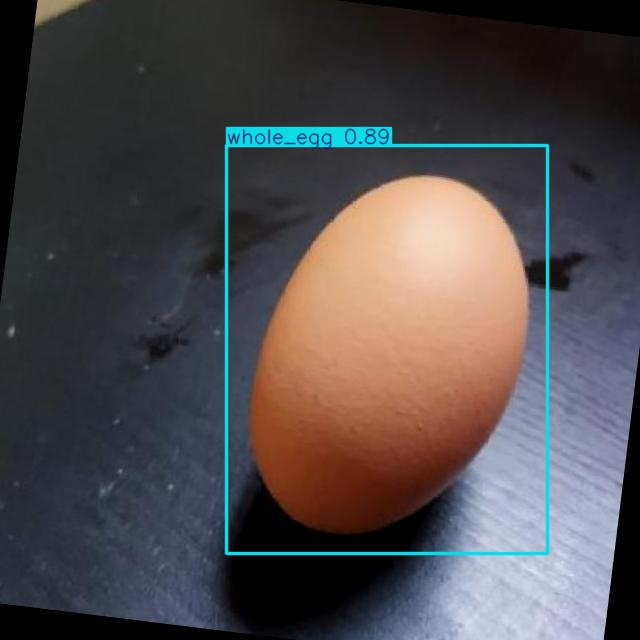


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/20211207_154434-0-_jpg.rf.91701c066fa92b52d65770442997e683.jpg


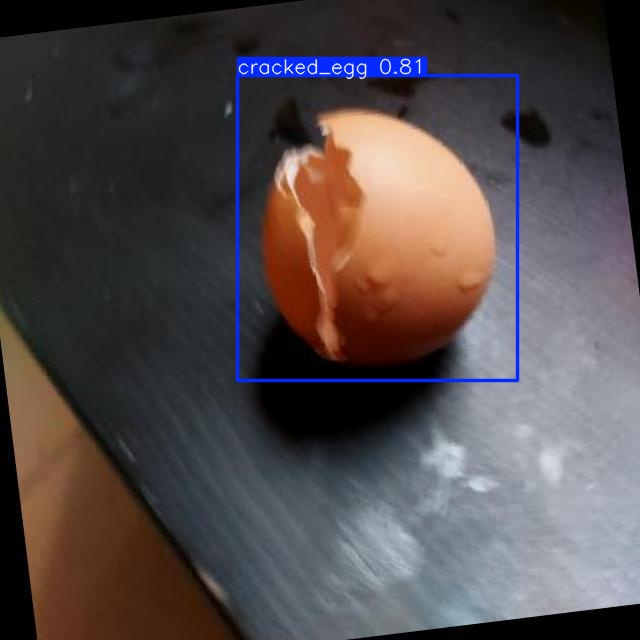


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/21_jpg.rf.06b1466c70e9c1943770841ffde3e942.jpg


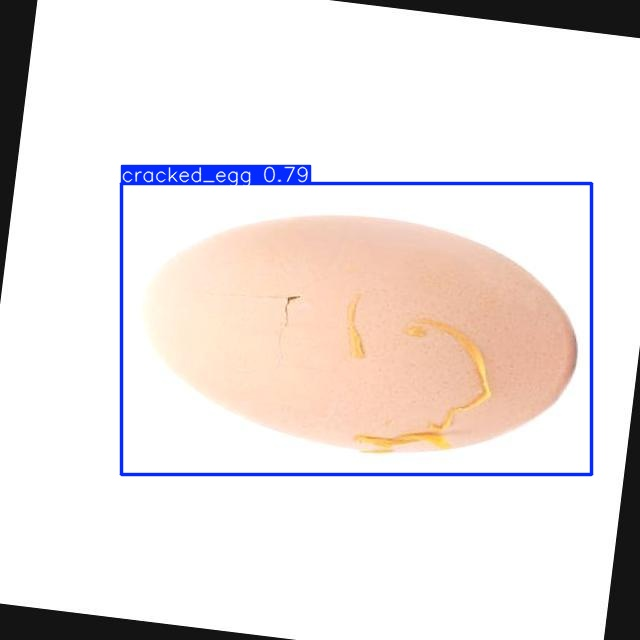


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/240_F_115258552_3HlUNf0vedaCCIaTotVQtXC1hpb68Fe1_jpg.rf.5b70c183aa968b56c0c5c3e450a135d6.jpg


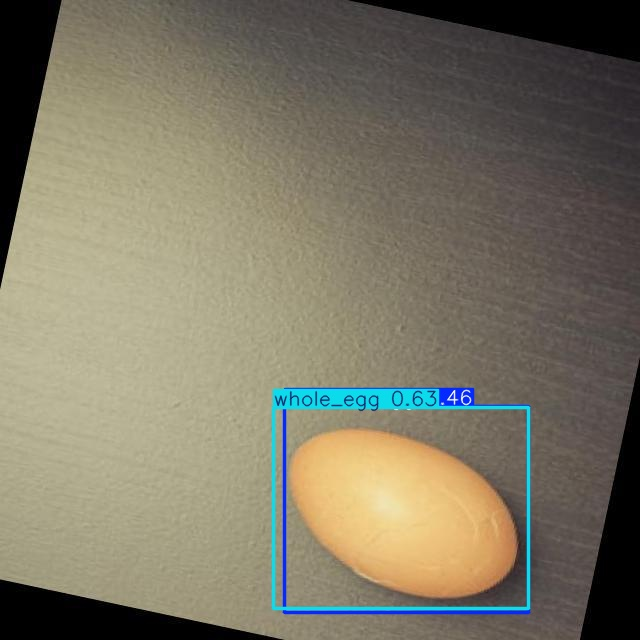


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/240_F_193723037_6wbivuru1Ux4zexUMtiBAqdW0fos96h5-1-_jpg.rf.c9bd7252af6d8da040ecfd144646d5a2.jpg


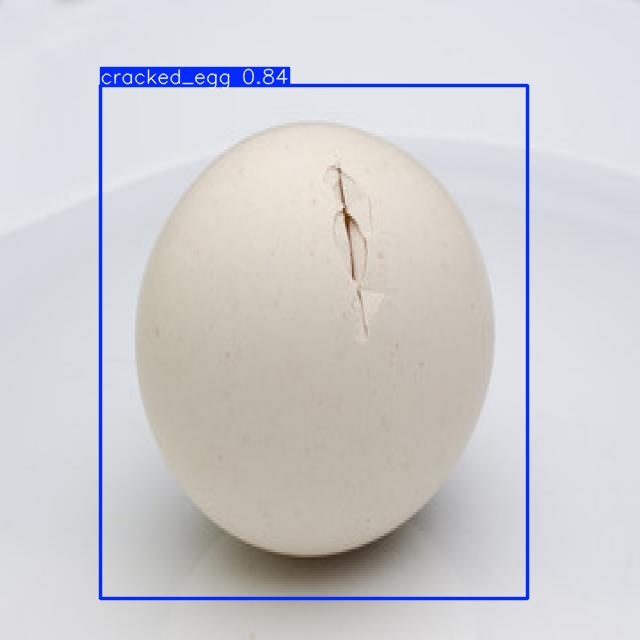


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/27_jpg.rf.ee5b61d9b092b53b1897134d1a1363a9.jpg


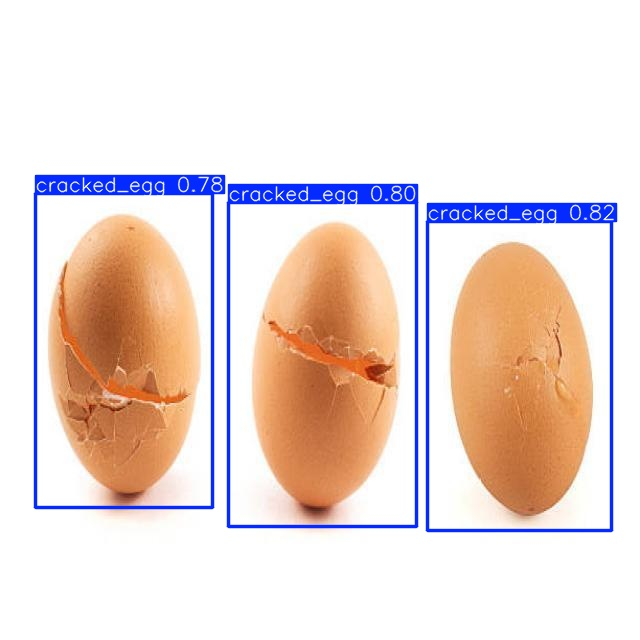


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/35_jpg.rf.3e1ae8cd4fe18a029fcf428066cbdd5e.jpg


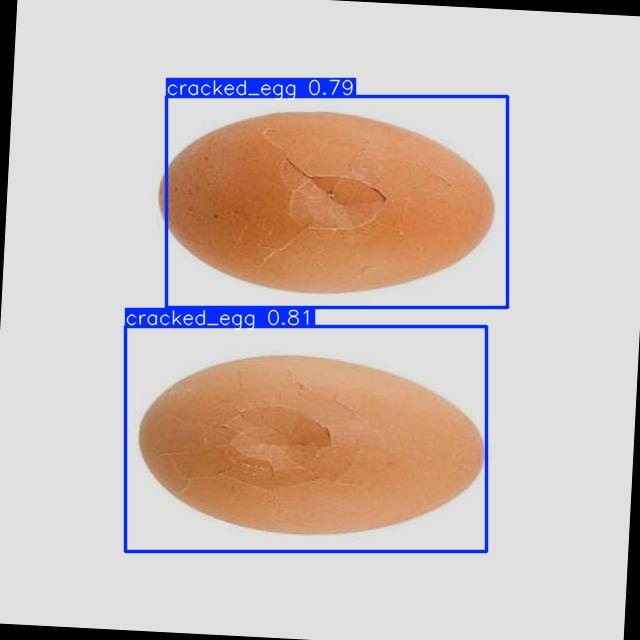


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/35_jpg.rf.586ed3f3ba4181cad688d2e1c9607035.jpg


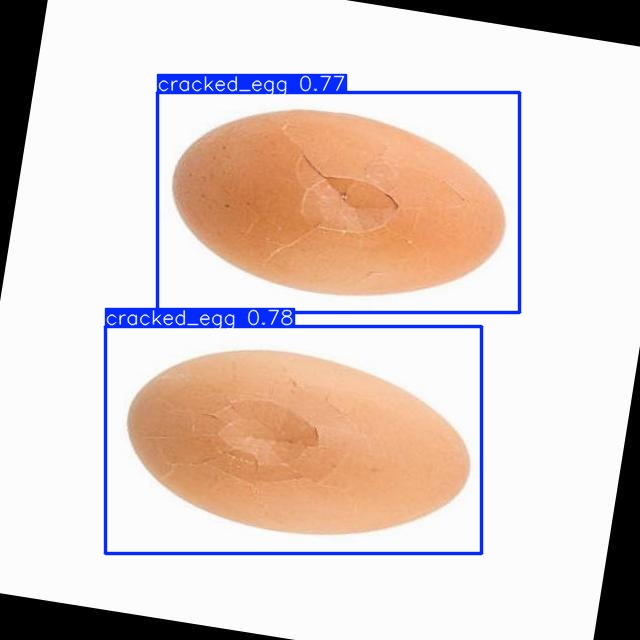


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/40_jpg.rf.ff7e6baea53482344dfdaf6a163a71d3.jpg


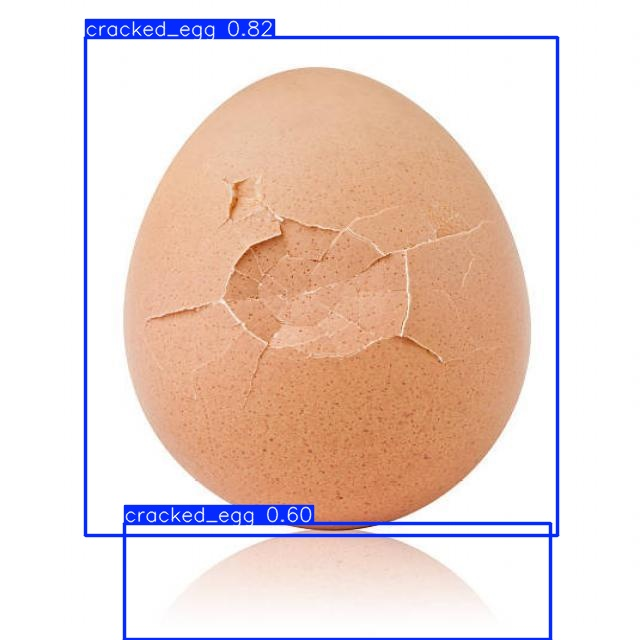


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/46_jpg.rf.0da50f800ff24cacaa8466f99e37a1bb.jpg


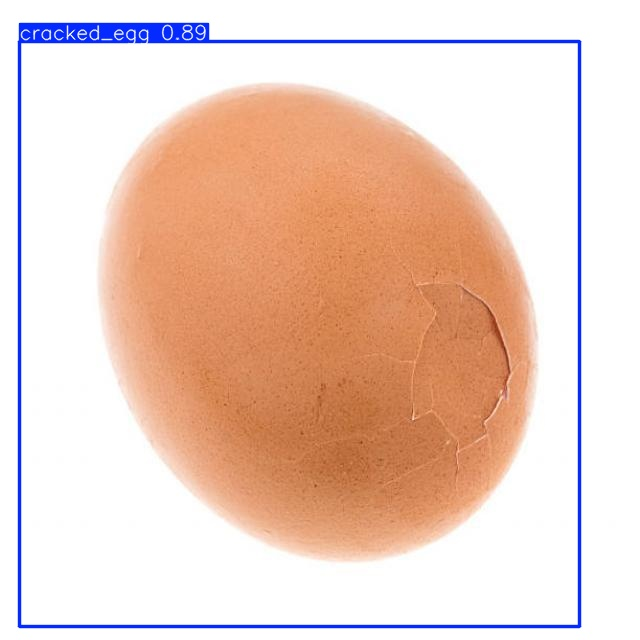


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/48_jpg.rf.f9fa775f31a5751272dd68343afc9c93.jpg


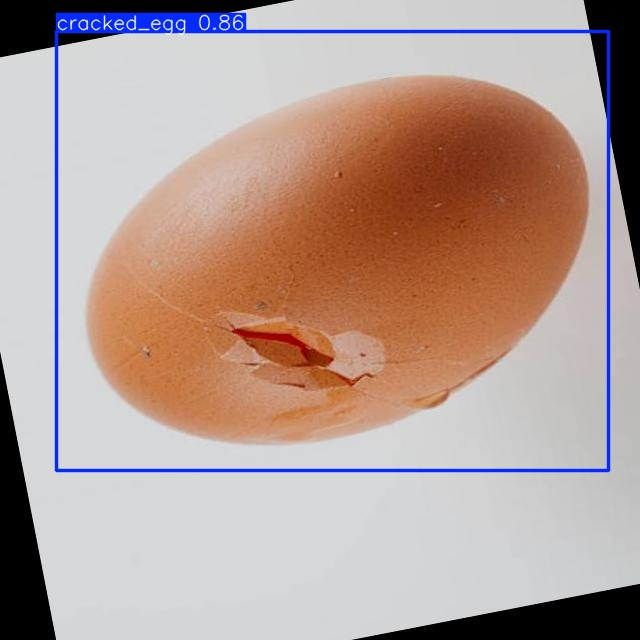


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/IMG20221105081336_jpg.rf.f4d1c947fab54b3f91e93b2323d4ad9b.jpg


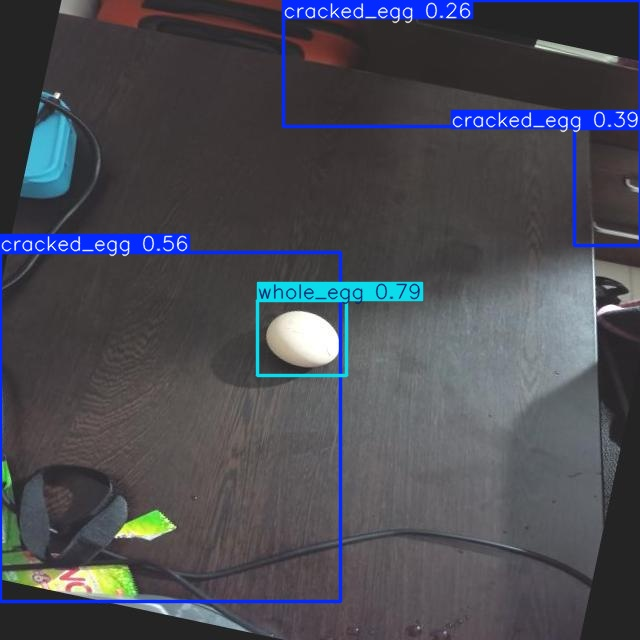


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/IMG20221105081341_jpg.rf.493872d384860da398d7f29d87f8fe83.jpg


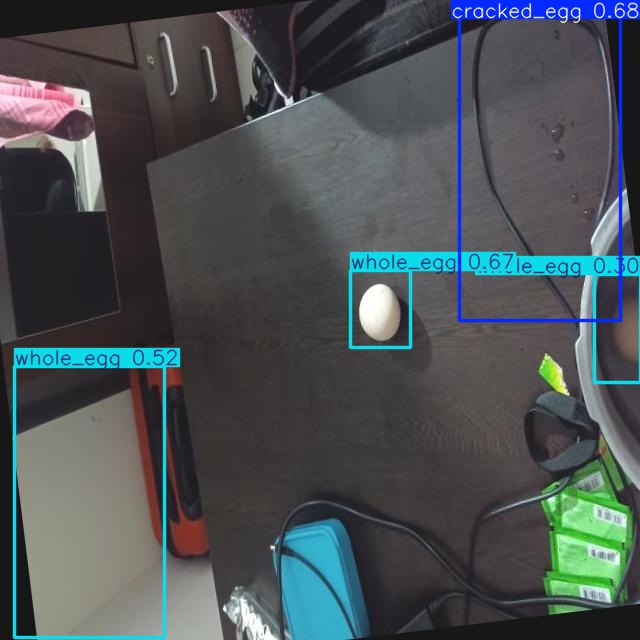


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/IMG20221105081514_jpg.rf.f525ec36bb0b2a6062afefa154cbdd16.jpg


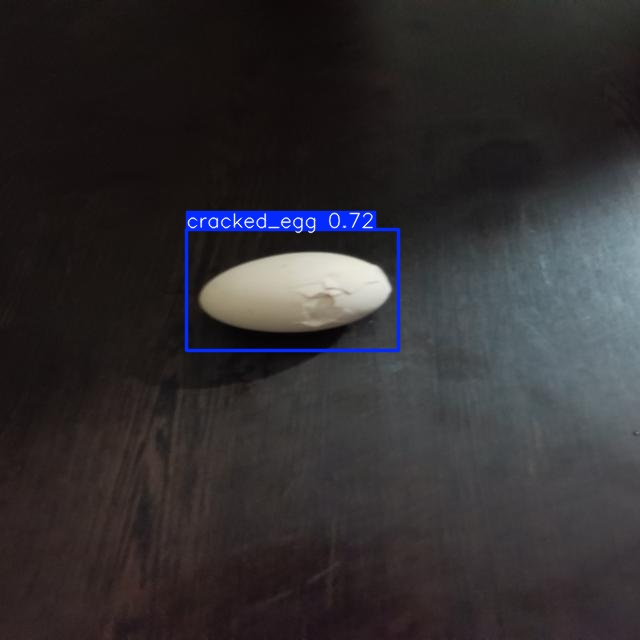


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/IMG20221105081655_jpg.rf.6638c136449b018915d6b3c3a749eafa.jpg


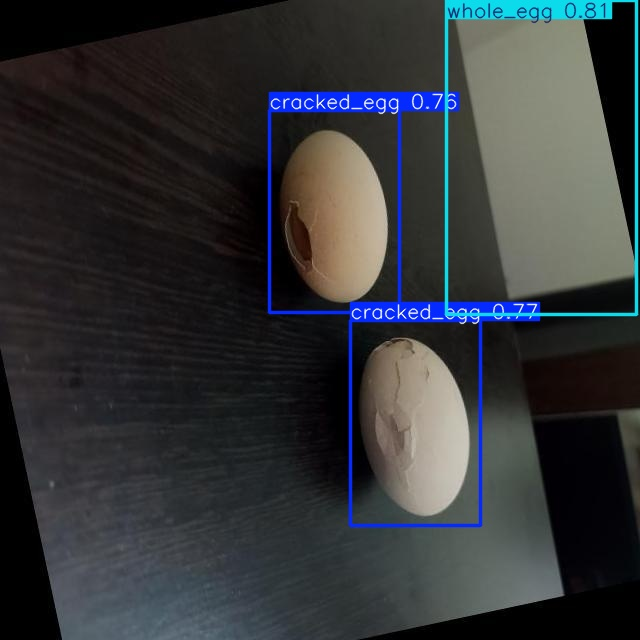


Prediction: egg_runs/exp1_yolov8s_test_preds_custom/IMG20221105081655_jpg.rf.799355a7f6b343cf4eab153feadf2b36.jpg


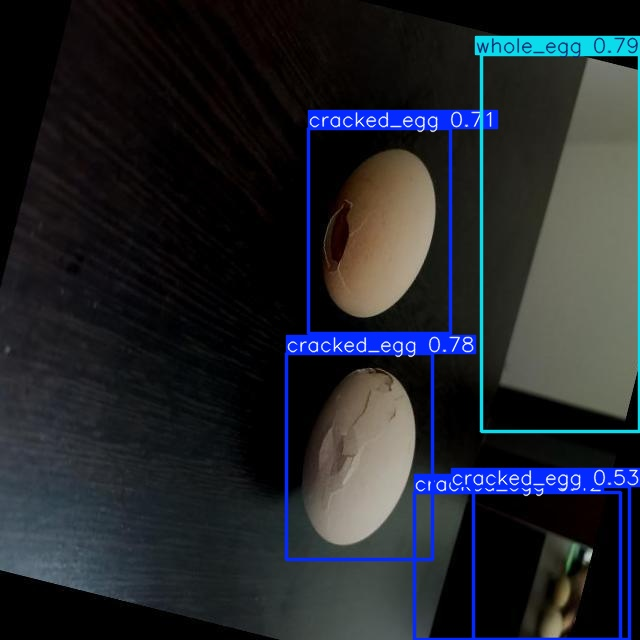

In [ ]:
import glob
from IPython.display import Image, display

# Load and sort all test images
test_images_all = sorted(glob.glob("/content/egg_dataset/test/images/*"))

print("Total test images found:", len(test_images_all))


test_images = test_images_all[:6]


for img in test_images:
    print(" ", img)

# Folder to save predictions
save_dir = "exp1_yolov8s_test_preds_custom"

# Run YOLO predictions
results = model_exp1.predict(
    source=test_images,
    imgsz=640,
    conf=0.25,
    save=True,
    project="egg_runs",
    name=save_dir,
    exist_ok=True
)

# Display prediction outputs
pred_files = sorted(glob.glob(f"egg_runs/{save_dir}/*.jpg"))

print("\nShowing prediction images:")
for f in pred_files:
    print("\nPrediction:", f)
    display(Image(filename=f))


In [ ]:
# Experiment 2: larger model, more epochs
model_exp2 = YOLO("yolov8m.pt")

results_exp2 = model_exp2.train(
    data=data_yaml_path,
    imgsz=640,
    epochs=100,
    batch=16,
    lr0=0.005,
    weight_decay=0.0005,
    project="egg_runs",
    name="exp2_yolov8m",
    verbose=True
)

print("Experiment 2 training finished.")


New https://pypi.org/project/ultralytics/8.3.234 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/egg_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=egg_runs, name=exp2_yolov8m2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/egg_dataset/train/labels.cache... 681 images, 0 backgrounds, 0 corrupt: 100%|██████████| 681/681 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/egg_dataset/valid/labels.cache... 65 images, 0 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]


Plotting labels to egg_runs/exp2_yolov8m2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.0005), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to egg_runs/exp2_yolov8m2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.57G      1.236      2.243      1.632         30        640: 100%|██████████| 43/43 [00:38<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]

                   all         65         81      0.874      0.331      0.726      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.54G      1.281      1.673      1.598         27        640: 100%|██████████| 43/43 [00:23<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         65         81   0.000744      0.153   0.000488   0.000115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.51G      1.339      1.524      1.595         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         65         81   0.000854     0.0161   0.000142   2.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.51G      1.353      1.365      1.587         28        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         65         81      0.745      0.185      0.257      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       7.5G      1.267      1.193      1.524         20        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         65         81      0.712      0.681      0.717      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.49G      1.235      1.087      1.481         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         65         81      0.856      0.435      0.473      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.47G      1.199      1.016      1.466         22        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         65         81      0.924      0.709      0.849      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.51G      1.255      1.008      1.517         22        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         65         81      0.874      0.822      0.883      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.51G      1.215      1.032      1.469         25        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81      0.713      0.788      0.776      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.53G       1.21     0.9714      1.463         33        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         65         81      0.737      0.733      0.742      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       7.5G      1.174     0.9164      1.437         27        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         65         81      0.757      0.833       0.87      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       7.5G      1.149     0.9099       1.42         21        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         65         81      0.924      0.766      0.835      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.52G      1.167     0.9093      1.419         26        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81      0.913      0.928      0.934      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.51G      1.137     0.8531      1.387         40        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         65         81      0.912       0.82      0.917      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.47G      1.141     0.8538      1.394         35        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         65         81      0.786      0.828       0.87       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.53G      1.145     0.8324      1.396         28        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         65         81      0.779      0.764      0.835      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       7.5G      1.103     0.8429      1.372         16        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         65         81      0.871      0.828       0.89       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.49G      1.126     0.8427      1.385         27        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         65         81      0.921      0.912      0.945      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.45G      1.091     0.7802       1.35         24        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         65         81       0.87      0.881      0.927      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.51G      1.119     0.8023      1.388         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.878       0.89      0.921      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.5G      1.109     0.7644      1.381         37        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         65         81      0.913       0.82      0.916      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       7.5G      1.102     0.7738      1.374         19        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         65         81      0.843      0.821       0.88      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.42G      1.098     0.7616      1.359         27        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         65         81      0.794      0.848      0.894      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.51G      1.089     0.7621      1.375         33        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         65         81      0.939      0.855      0.931      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.51G      1.059     0.7413      1.348         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         65         81      0.929      0.834      0.908      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.51G      1.076     0.7519      1.346         24        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         65         81       0.89      0.868      0.929      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.45G      1.075     0.7219       1.36         25        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         65         81      0.922      0.877      0.933      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.51G      1.071     0.7286      1.349         22        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         65         81      0.824       0.88      0.901      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       7.5G      1.071     0.7246      1.353         32        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         65         81      0.875      0.839      0.907      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.51G      1.051     0.7218      1.324         37        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         65         81      0.938      0.913      0.948       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.44G      1.048     0.7008      1.336         21        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81       0.94      0.828      0.919      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.56G      1.014     0.6967      1.309         27        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         65         81      0.807      0.919       0.92      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.53G      1.029     0.6821      1.321         36        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         65         81       0.96      0.865      0.933      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.51G      1.017     0.6604      1.304         31        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         65         81       0.89      0.887      0.905      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.44G      1.052     0.6776      1.312         31        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         65         81      0.924      0.897      0.924      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       7.5G      1.004     0.6751      1.324         23        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         65         81      0.948      0.829      0.921       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.54G     0.9979     0.6579      1.294         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         65         81       0.88      0.854      0.905      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.51G      1.026      0.684      1.319         24        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         65         81       0.95      0.829      0.945      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.43G     0.9727     0.6627      1.299         22        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         65         81      0.951      0.824      0.901       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       7.5G      1.006     0.6706      1.314         24        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         65         81      0.898      0.913      0.936      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.51G      1.022      0.661       1.32         26        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.931      0.847      0.905      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       7.5G       0.98     0.6448      1.292         31        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         65         81      0.935      0.871      0.926      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.45G     0.9736     0.6273      1.293         30        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         65         81      0.923      0.896      0.916      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.5G     0.9679     0.6318       1.29         19        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         65         81      0.969      0.884      0.939      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.51G      0.987     0.6271        1.3         25        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         65         81      0.936      0.868      0.896      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.53G     0.9855     0.6356       1.28         30        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         65         81      0.936      0.897      0.944      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.44G     0.9603     0.6383      1.267         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.941      0.905      0.936       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.54G     0.9627     0.6154      1.273         23        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         65         81      0.964      0.881      0.955      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.48G     0.9216     0.5876      1.249         34        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         65         81      0.943      0.909      0.947      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       7.5G     0.9363     0.6029      1.263         21        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.938      0.864      0.928      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.42G     0.9376     0.5983      1.263         30        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         65         81      0.916      0.907      0.952      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.51G     0.9207     0.5862      1.247         20        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         65         81      0.899      0.909      0.935      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.56G     0.9666     0.6197      1.274         34        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81      0.952      0.855      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       7.5G     0.9262     0.5826      1.257         29        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         65         81      0.866      0.887      0.928      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.47G     0.9173     0.5967      1.246         24        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         65         81       0.96      0.921      0.957       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.52G     0.9219     0.5628      1.249         20        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         65         81      0.949      0.909      0.954       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.51G     0.9154     0.5626      1.253         26        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.929      0.882      0.939      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.51G      0.888     0.5457      1.231         28        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.955      0.882      0.924      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.42G     0.9015     0.5549       1.24         32        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         65         81      0.926      0.939      0.935      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.52G     0.8797     0.5474      1.225         30        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         65         81      0.938      0.888      0.932      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.49G     0.8932     0.5562      1.246         27        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         65         81      0.965      0.863       0.94      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.52G     0.8765     0.5451      1.227         22        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         65         81      0.975      0.843      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.44G     0.8817      0.538      1.226         28        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         65         81      0.814      0.906      0.918      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       7.5G     0.8891     0.5337       1.22         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.923      0.869      0.937      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.51G     0.8923     0.5446      1.235         22        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         65         81      0.953      0.901      0.949       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.51G     0.8794     0.5524      1.229         25        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81      0.948      0.905      0.944      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       7.5G      0.883      0.563      1.228         19        640: 100%|██████████| 43/43 [00:23<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.965      0.843      0.935      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       7.5G     0.8616     0.5244      1.215         17        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.922      0.863      0.929      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.53G     0.8949     0.5435      1.239         20        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         65         81      0.961       0.86      0.941      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.5G     0.8579     0.5288      1.221         29        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.929      0.932      0.952      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.51G      0.894     0.5273      1.214         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         65         81      0.958      0.913       0.94      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.52G     0.8738     0.5254      1.206         20        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         65         81      0.937      0.905      0.942      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       7.5G     0.8426     0.5108      1.202         22        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         65         81      0.954      0.873      0.934      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.52G     0.8559     0.5074      1.211         35        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         65         81      0.969      0.878      0.942      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.43G     0.8478     0.5082      1.203         36        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         65         81      0.955      0.886      0.947      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.54G     0.8504     0.5138      1.193         30        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         65         81      0.946      0.918      0.953      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.53G     0.8499      0.531      1.204         14        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         65         81      0.966      0.866      0.935      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.53G     0.8448     0.5047      1.214         24        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.876      0.931      0.936      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.45G      0.832     0.4906      1.199         28        640: 100%|██████████| 43/43 [00:23<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         65         81      0.925      0.905      0.943      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.5G     0.8311     0.4834      1.191         29        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         65         81      0.921      0.899      0.948      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.51G     0.8065     0.4879      1.183         27        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         65         81      0.937      0.899      0.943      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.52G     0.8121     0.5053      1.191         27        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         65         81      0.949       0.93      0.948      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.42G     0.7949     0.4634      1.168         20        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         65         81      0.946      0.887      0.941      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.53G     0.8185     0.4868      1.186         16        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         65         81      0.973      0.876      0.949      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.53G     0.8043     0.4849      1.178         28        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         65         81      0.975      0.905      0.958      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.51G     0.8091     0.4918      1.189         25        640: 100%|██████████| 43/43 [00:23<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         65         81      0.928      0.901      0.952      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       7.5G      0.802     0.4816      1.183         26        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.897      0.931      0.952      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.51G     0.7658     0.4464       1.17         40        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         65         81      0.958      0.931      0.961      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.51G     0.7833     0.4557      1.148         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         65         81      0.916      0.939      0.958      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       7.5G     0.7868     0.4547      1.168         27        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         65         81      0.914      0.908      0.945      0.667


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.42G     0.7069     0.3518      1.169         17        640: 100%|██████████| 43/43 [00:23<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         65         81      0.964      0.887      0.945      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.51G     0.7046     0.3326      1.161         19        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         65         81      0.966      0.883      0.933      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       7.5G     0.7189      0.327      1.177         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         65         81      0.971       0.86      0.938      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.51G     0.7027     0.3331      1.167         11        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         65         81      0.973      0.852       0.95      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.42G     0.7054     0.3219      1.166         12        640: 100%|██████████| 43/43 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         65         81      0.959      0.875      0.954      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.51G     0.6931     0.3191      1.162         11        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         65         81      0.947      0.911       0.96      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       7.5G     0.6823     0.3136       1.16         16        640: 100%|██████████| 43/43 [00:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         65         81      0.959      0.885      0.957       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.51G     0.6656     0.3063      1.144          9        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         65         81      0.962      0.927      0.955      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.42G     0.6665     0.3061      1.154         10        640: 100%|██████████| 43/43 [00:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         65         81      0.953      0.899      0.954       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       7.5G     0.6666      0.299      1.153          9        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         65         81      0.968      0.886      0.953      0.685



100 epochs completed in 0.792 hours.
Optimizer stripped from egg_runs/exp2_yolov8m2/weights/last.pt, 46.8MB
Optimizer stripped from egg_runs/exp2_yolov8m2/weights/best.pt, 46.8MB

Validating egg_runs/exp2_yolov8m2/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 236 layers, 23,203,990 parameters, 0 gradients, 67.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


                   all         65         81      0.943      0.909      0.947      0.721
           cracked_egg         53         62      0.946      0.984      0.979       0.76
             whole_egg         16         19      0.941      0.834      0.916      0.682
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to egg_runs/exp2_yolov8m2


Experiment 2 training finished.


YOLOv8m Training Curves (Experiment 2):


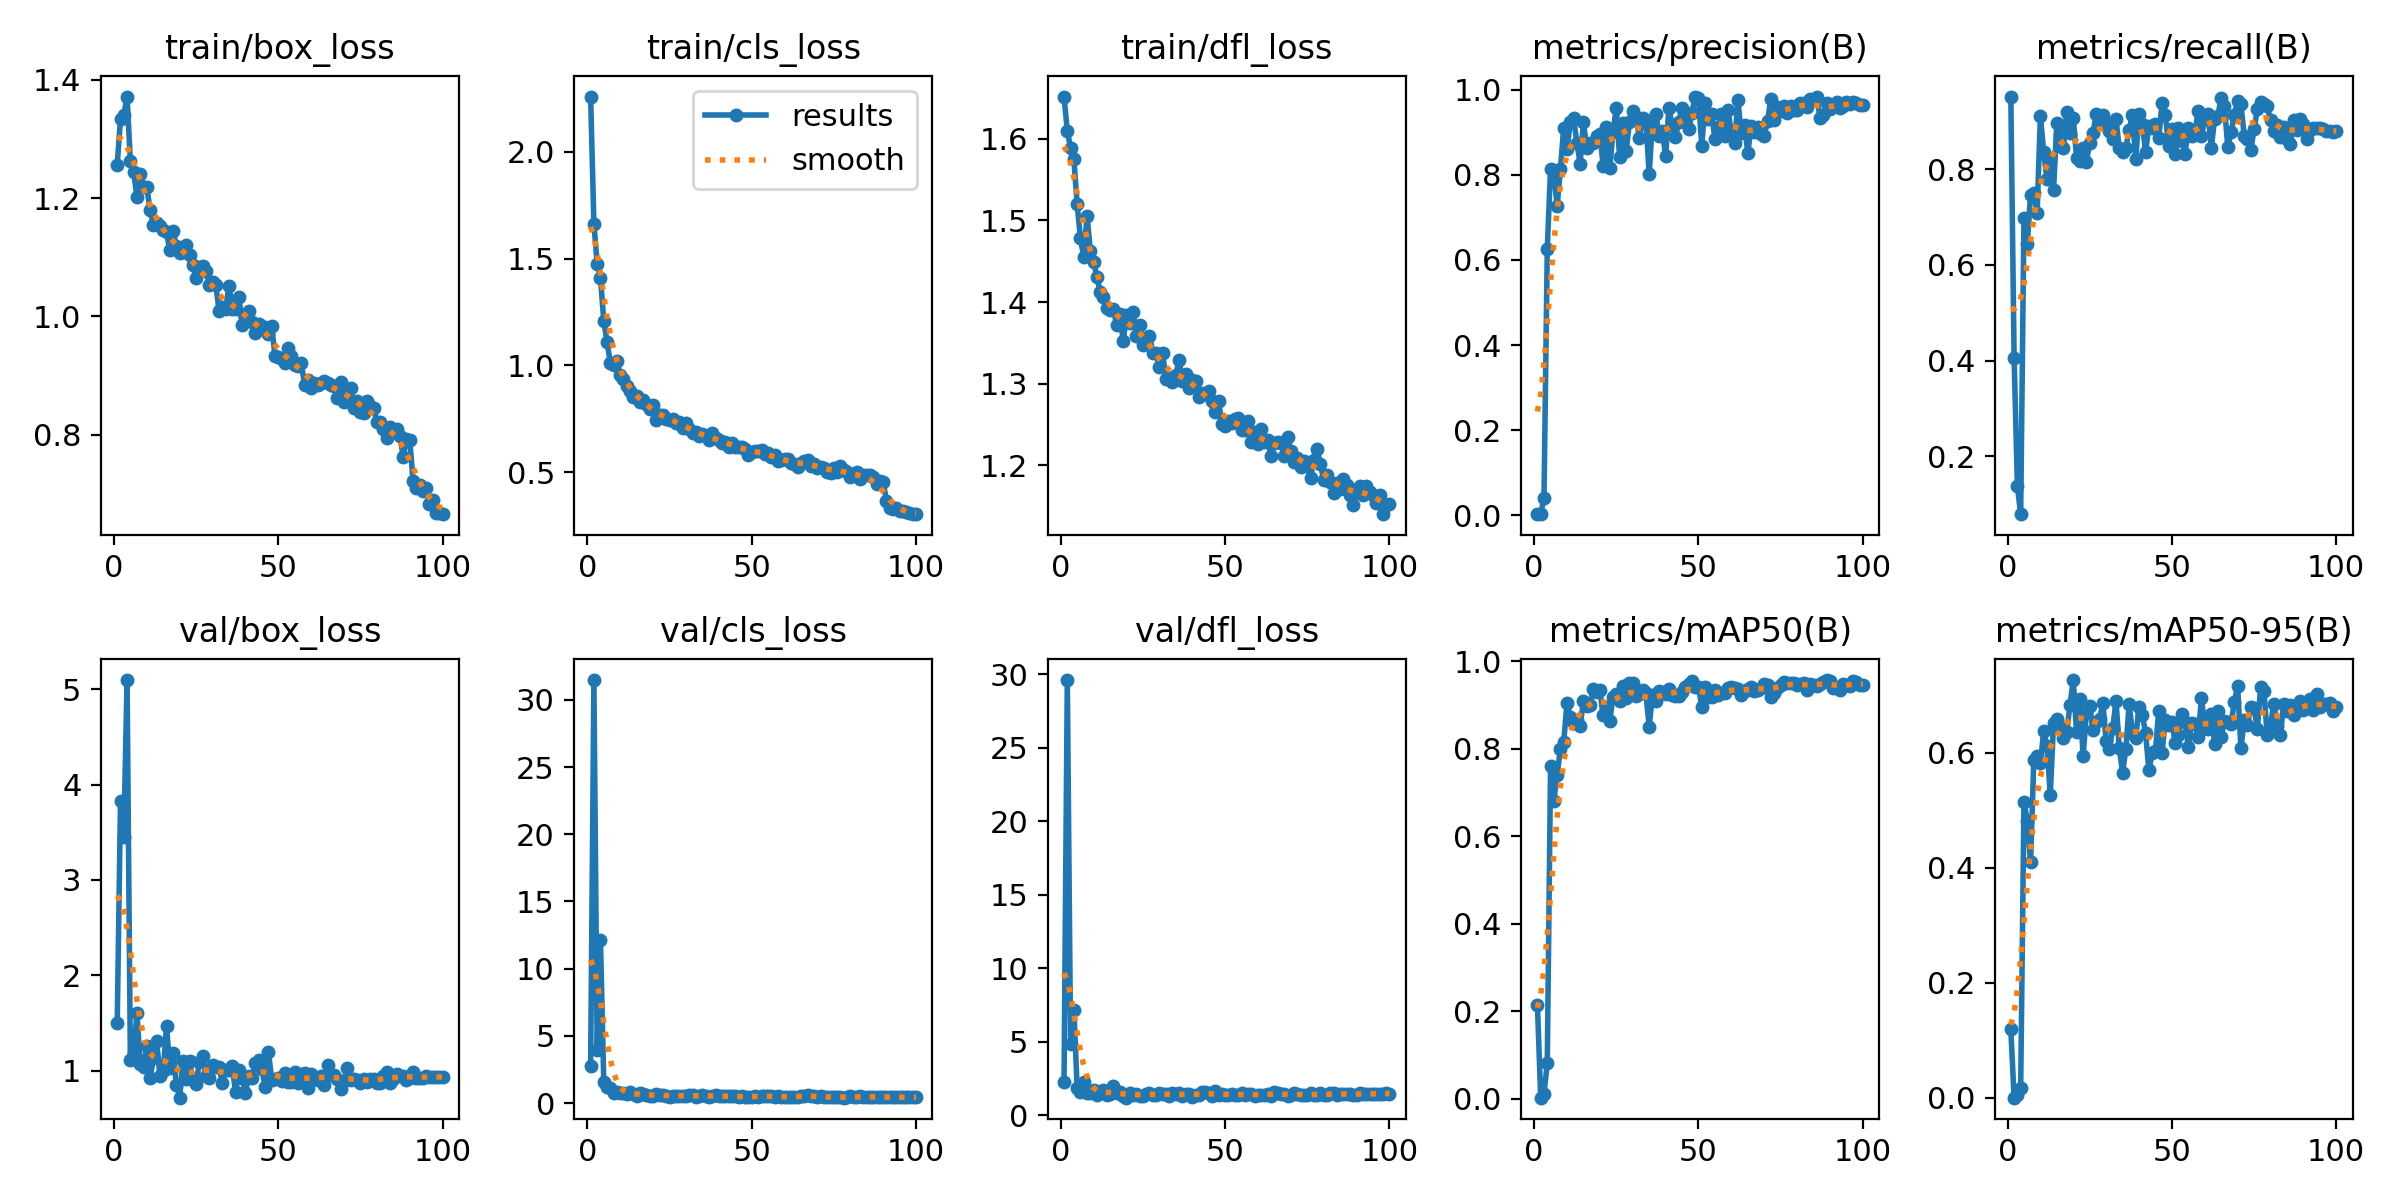

In [ ]:
from IPython.display import Image, display
import os

exp2_results_png = "egg_runs/exp2_yolov8m/results.png"

if os.path.exists(exp2_results_png):
    print("YOLOv8m Training Curves (Experiment 2):")
    display(Image(filename=exp2_results_png))
else:
    print("No exp2_yolov8m/results.png found – maybe Exp2 not trained yet")


In [ ]:
import os

metrics_summary = {}

# Exp1 metrics already computed: metrics_exp1
metrics_summary["YOLOv8s (Exp1)"] = {
    "mAP50":    float(metrics_exp1.results_dict.get("metrics/mAP50(B)", 0)),
    "mAP50-95": float(metrics_exp1.results_dict.get("metrics/mAP50-95(B)", 0)),
}

# Try to evaluate Exp2 (if weights exist)
exp2_weights = "egg_runs/exp2_yolov8m/weights/best.pt"

if os.path.exists(exp2_weights):
    model_exp2 = YOLO(exp2_weights)
    metrics_exp2 = model_exp2.val(
        data=data_yaml_path,
        imgsz=640,
        project="egg_runs",
        name="exp2_yolov8m_val"
    )
    metrics_summary["YOLOv8m (Exp2)"] = {
        "mAP50":    float(metrics_exp2.results_dict.get("metrics/mAP50(B)", 0)),
        "mAP50-95": float(metrics_exp2.results_dict.get("metrics/mAP50-95(B)", 0)),
    }
else:
    print("Exp2 weights not found – skipping Exp2 evaluation.")

metrics_summary


Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 236 layers, 23,203,990 parameters, 0 gradients, 67.4 GFLOPs


val: Scanning /content/egg_dataset/valid/labels.cache... 65 images, 0 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


                   all         65         81      0.896      0.907      0.934      0.727
           cracked_egg         53         62      0.904      0.984      0.975      0.757
             whole_egg         16         19      0.887       0.83      0.893      0.697
Speed: 0.5ms preprocess, 27.2ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to egg_runs/exp2_yolov8m_val2


{'YOLOv8s (Exp1)': {'mAP50': 0.9445041218271032,
  'mAP50-95': 0.7007120870908996},
 'YOLOv8m (Exp2)': {'mAP50': 0.9340536947588689,
  'mAP50-95': 0.726749646444264}}

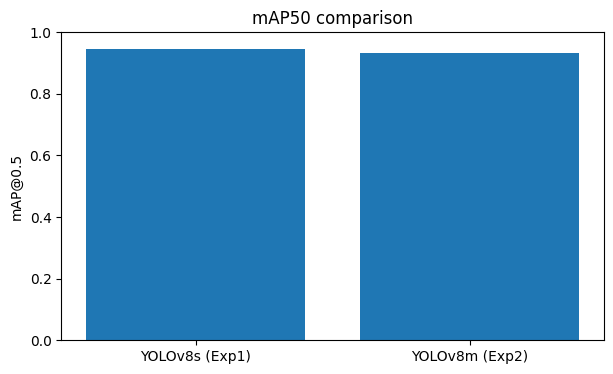

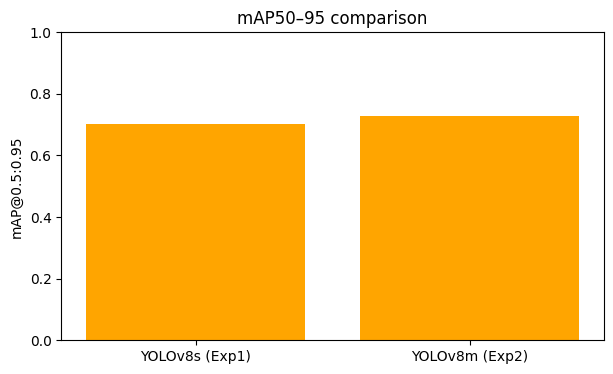

In [ ]:
import matplotlib.pyplot as plt

labels = list(metrics_summary.keys())
map50 = [metrics_summary[m]["mAP50"] for m in labels]
map5095 = [metrics_summary[m]["mAP50-95"] for m in labels]

plt.figure(figsize=(7,4))
plt.bar(labels, map50)
plt.ylabel("mAP@0.5")
plt.title("mAP50 comparison")
plt.ylim(0, 1.0)
plt.show()

plt.figure(figsize=(7,4))
plt.bar(labels, map5095, color="orange")
plt.ylabel("mAP@0.5:0.95")
plt.title("mAP50–95 comparison")
plt.ylim(0, 1.0)
plt.show()


In [ ]:
import os

exp2_best = "egg_runs/exp2_yolov8m/weights/best.pt"
exp1_best = "egg_runs/exp1_yolov8s/weights/best.pt"

if os.path.exists(exp2_best):
    best_model_path = exp2_best
    print("Using Exp2 (YOLOv8m) as final model.")
else:
    best_model_path = exp1_best
    print("Exp2 not available – using Exp1 (YOLOv8s) as final model.")

print("Best model path:", best_model_path)


Using Exp2 (YOLOv8m) as final model.
Best model path: egg_runs/exp2_yolov8m/weights/best.pt


In [ ]:
from ultralytics import YOLO

print("Loading final model:", best_model_path)
final_model = YOLO(best_model_path)

# Evaluate on test set
metrics = final_model.val(
    data=data_yaml_path,
    imgsz=640,
    split="test",
    conf=0.25
)

print("\nFinal Model Evaluation on Test Set:")
print(metrics)


Loading final model: egg_runs/exp2_yolov8m/weights/best.pt
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 236 layers, 23,203,990 parameters, 0 gradients, 67.4 GFLOPs


val: Scanning /content/egg_dataset/test/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         32         48      0.867      0.824      0.909      0.728
           cracked_egg         28         40          1      0.898      0.957      0.774
             whole_egg          5          8      0.733       0.75      0.861      0.682
Speed: 0.3ms preprocess, 22.6ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val2

Final Model Evaluation on Test Set:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3fa23e0a70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.0


0: 640x640 1 cracked_egg, 26.9ms
1: 640x640 1 cracked_egg, 26.9ms
2: 640x640 1 cracked_egg, 26.9ms
3: 640x640 4 whole_eggs, 26.9ms
4: 640x640 1 whole_egg, 26.9ms
5: 640x640 1 cracked_egg, 26.9ms
6: 640x640 1 cracked_egg, 26.9ms
7: 640x640 1 whole_egg, 26.9ms
8: 640x640 1 cracked_egg, 26.9ms
Speed: 8.5ms preprocess, 26.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to egg_runs/final_model_predictions

Showing Final Model Predictions:

Prediction: egg_runs/final_model_predictions/11_jpg.rf.b15be37197cded5b71fd6cb2d257fbe9.jpg


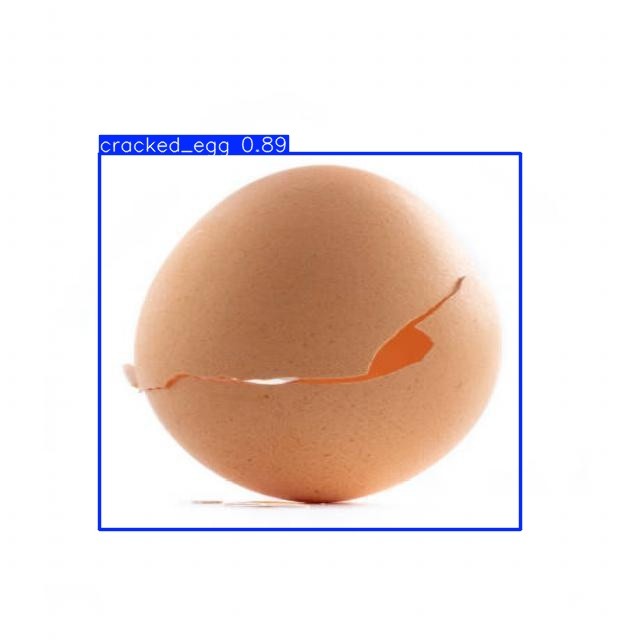


Prediction: egg_runs/final_model_predictions/17_jpg.rf.3a0c73acb511379e9e32059e15444ab4.jpg


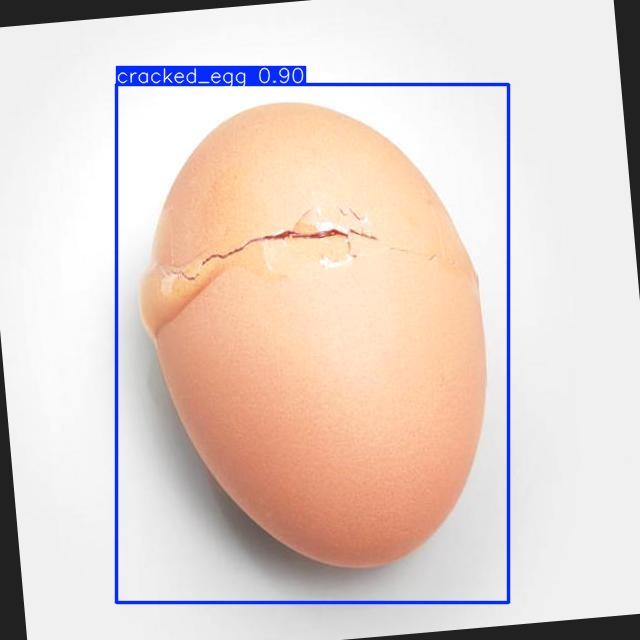


Prediction: egg_runs/final_model_predictions/17_jpg.rf.7a84401bbfa52c458607e448d506b9c3.jpg


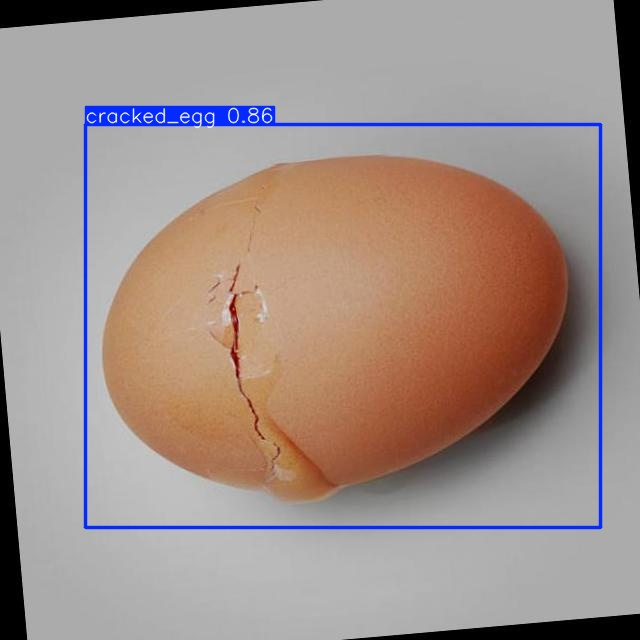


Prediction: egg_runs/final_model_predictions/1_png.rf.cfcee3e76a58e8556b04c07b008da421.jpg


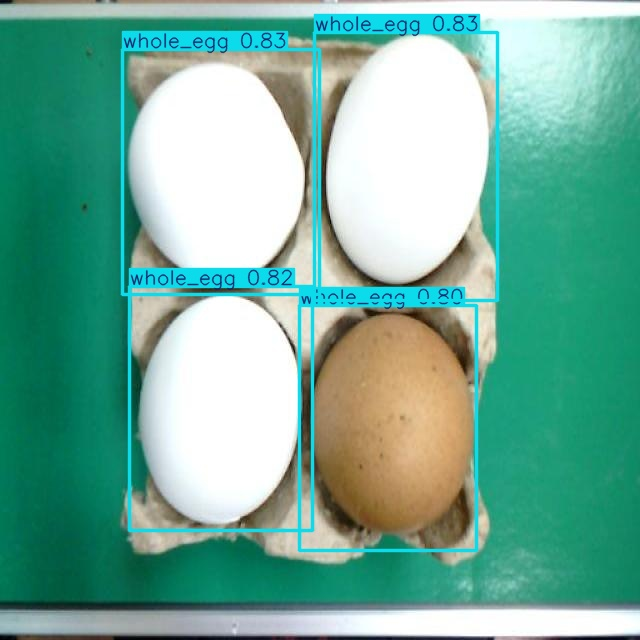


Prediction: egg_runs/final_model_predictions/20211207_153947_mp4-5_jpg.rf.03b5321b1746ca0c4cc6f61374573ece.jpg


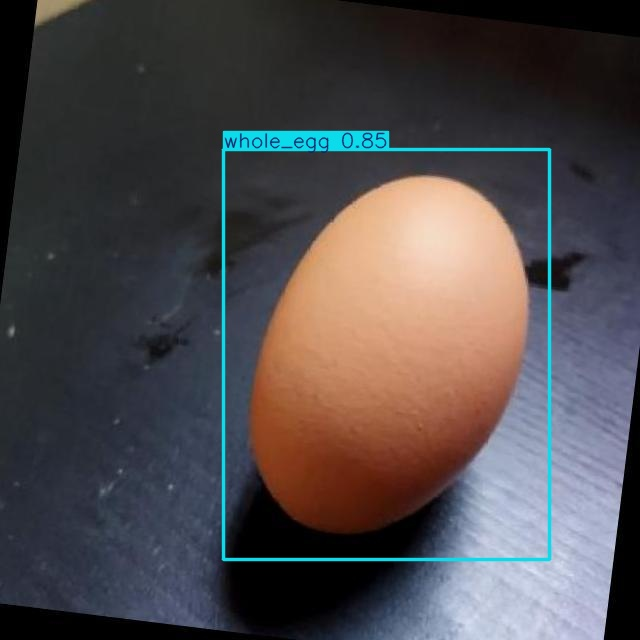


Prediction: egg_runs/final_model_predictions/20211207_154434-0-_jpg.rf.91701c066fa92b52d65770442997e683.jpg


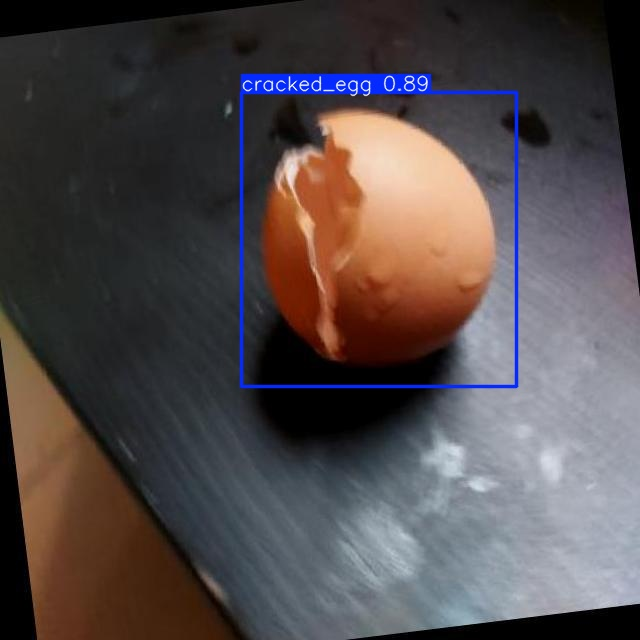


Prediction: egg_runs/final_model_predictions/21_jpg.rf.06b1466c70e9c1943770841ffde3e942.jpg


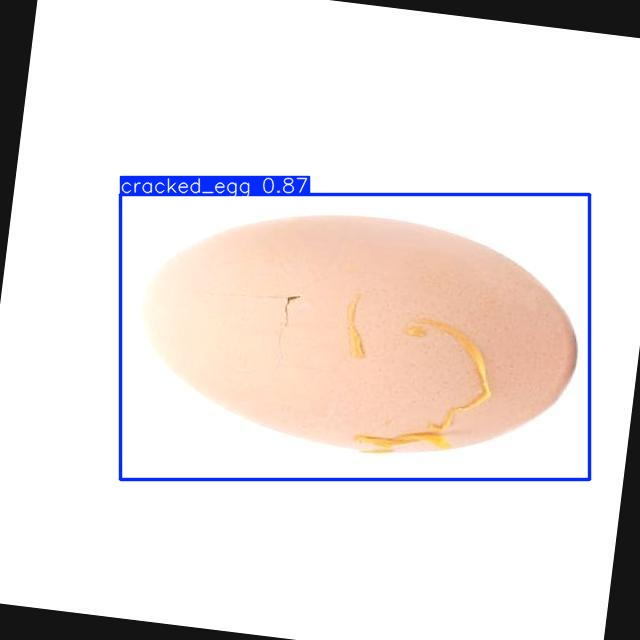


Prediction: egg_runs/final_model_predictions/240_F_115258552_3HlUNf0vedaCCIaTotVQtXC1hpb68Fe1_jpg.rf.5b70c183aa968b56c0c5c3e450a135d6.jpg


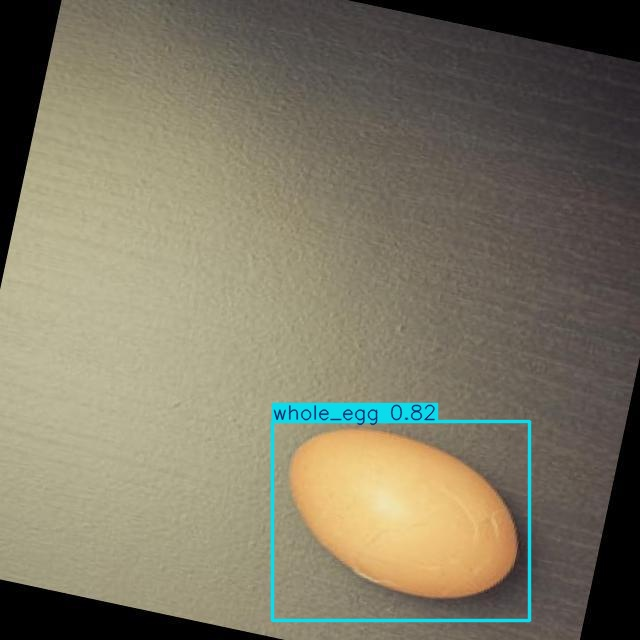


Prediction: egg_runs/final_model_predictions/240_F_193723037_6wbivuru1Ux4zexUMtiBAqdW0fos96h5-1-_jpg.rf.c9bd7252af6d8da040ecfd144646d5a2.jpg


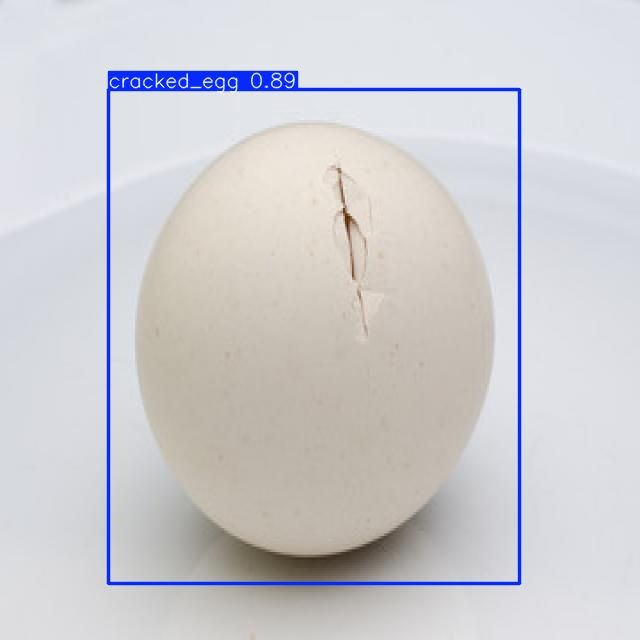

In [ ]:
import glob
from IPython.display import Image, display

test_images = sorted(glob.glob("/content/egg_dataset/test/images/*"))[:9]

save_dir = "final_model_predictions"

results = final_model.predict(
    source=test_images,
    imgsz=640,
    conf=0.25,
    save=True,
    project="egg_runs",
    name=save_dir,
    exist_ok=True
)

pred_files = sorted(glob.glob(f"egg_runs/{save_dir}/*.jpg"))

print("\nShowing Final Model Predictions:")
for f in pred_files:
    print("\nPrediction:", f)
    display(Image(filename=f))


In [ ]:
!pip install onnx onnxruntime onnxscript openvino-dev

print("Exporting to ONNX...")
final_model.export(format="onnx")

print("Exporting to OpenVINO...")
final_model.export(format="openvino")


Exporting to ONNX...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'egg_runs/exp2_yolov8m/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (44.6 MB)

ONNX: starting export with onnx 1.20.0 opset 10...


W1203 18:32:13.982000 39517 torch/onnx/_internal/exporter/_compat.py:114] Setting ONNX exporter to use operator set version 18 because the requested opset_version 10 is a lower version than we have implementations for. Automatic version conversion will be performed, which may not be successful at converting to the requested version. If version conversion is unsuccessful, the opset version of the exported model will be kept at 18. Please consider setting opset_version >=18 to leverage latest ONNX features
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/__init__.py", line 127, in call
    converted_proto = _c_api_utils.call_onnx_api(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/_c_api_utils.py", line 65, in call_onnx_api
    result = func(proto)
             ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converte

Applied 1 of general pattern rewrite rules.
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 24.1s, saved as 'egg_runs/exp2_yolov8m/weights/best.onnx' (88.7 MB)

Export complete (25.9s)
Results saved to /content/egg_runs/exp2_yolov8m/weights
Predict:         yolo predict task=detect model=egg_runs/exp2_yolov8m/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=egg_runs/exp2_yolov8m/weights/best.onnx imgsz=640 data=/content/egg_dataset/data.yaml  
Visualize:       https://netron.app
Exporting to OpenVINO...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'egg_runs/exp2_yolov8m/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (44.6 MB)

OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 12.4s, saved as 'egg_runs/exp2_yolov8m/weights/best_openvino_model/' (88.9 MB)

Export complete (14.1s)
Results sa

'egg_runs/exp2_yolov8m/weights/best_openvino_model'

In [ ]:
# This uses the best_model_path you already created (Exp2 YOLOv8m or falls back to Exp1)
import shutil

export_model_path = "/content/egg_eggDetector_best.pt"
shutil.copy(best_model_path, export_model_path)

print("Copied best model to:", export_model_path)


Copied best model to: /content/egg_eggDetector_best.pt
